# **Data Preprocessing**

In [ ]:
import pandas as pd

file_path= '/content/cleaned_survey_data.csv'
df= pd.read_csv(file_path)
df.head()

Timestamp                 Name:-  \
0  4/27/2024 21:43:57         J Anandhavalli   
1  4/28/2024 18:18:14  Sandhiya Thiagarajan    
2  4/28/2024 20:15:29          S.Parasuraman   
3  4/29/2024 10:09:36                 Basker   
4  4/30/2024 16:31:36       Lakshmi sridhar    

  How do you feel is the hostel annual room rent when compared to outside private hostel accommodation in Thanjavur / Trichy?  \
0                                               Same                                                                            
1                                              Lower                                                                            
2                                             Higher                                                                            
3                                              Lower                                                                            
4                                               Same                                                                            

  Do you think the answer to the above is based on comparable hostel accommodation?  \
0                                    Yes, comparable                                  
1                                    Yes, comparable                                  
2                                    Yes, comparable                                  
3                                    Yes, comparable                                  
4                                    Yes, comparable                                  

  How do you feel is the hostel annual room rent when compared to other private universities?  \
0                                              Lower                                            
1                                              Lower                                            
2                                             Higher                                            
3                                              Lower                                            
4                                              Lower                                            

  How do you compare your hostel with other private accommodation outside? [Hostel Security]  \
0                                             Better                                           
1                                             Better                                           
2                                             Better                                           
3                                             Better                                           
4                                             Better                                           

  How do you compare your hostel with other private accommodation outside? [Room Comfort]  \
0                                             Better                                        
1                                             Better                                        
2                                             Better                                        
3                                           Inferior                                        
4                                               Same                                        

  How do you compare your hostel with other private accommodation outside? [Food quality]  \
0                                           Inferior                                        
1                                               Same                                        
2                                             Better                                        
3                                           Inferior                                        
4                                               Same                                        

  How do you compare your hostel with other private accommodation outside? [Food variety]  \
0                                           Inferior  

In [ ]:
clean_df=df.drop(columns=["Name:-","Timestamp"])
clean_df.head()

How do you feel is the hostel annual room rent when compared to outside private hostel accommodation in Thanjavur / Trichy?  \
0                                               Same                                                                            
1                                              Lower                                                                            
2                                             Higher                                                                            
3                                              Lower                                                                            
4                                               Same                                                                            

  Do you think the answer to the above is based on comparable hostel accommodation?  \
0                                    Yes, comparable                                  
1                                    Yes, comparable                                  
2                                    Yes, comparable                                  
3                                    Yes, comparable                                  
4                                    Yes, comparable                                  

  How do you feel is the hostel annual room rent when compared to other private universities?  \
0                                              Lower                                            
1                                              Lower                                            
2                                             Higher                                            
3                                              Lower                                            
4                                              Lower                                            

  How do you compare your hostel with other private accommodation outside? [Hostel Security]  \
0                                             Better                                           
1                                             Better                                           
2                                             Better                                           
3                                             Better                                           
4                                             Better                                           

  How do you compare your hostel with other private accommodation outside? [Room Comfort]  \
0                                             Better                                        
1                                             Better                                        
2                                             Better                                        
3                                           Inferior                                        
4                                               Same                                        

  How do you compare your hostel with other private accommodation outside? [Food quality]  \
0                                           Inferior                                        
1                                               Same                                        
2                                             Better                                        
3                                           Inferior                                        
4                                               Same                                        

  How do you compare your hostel with other private accommodation outside? [Food variety]  \
0                                           Inferior                                        
1                                             Better                                        
2                                             Better                                        
3                                           Inferior  

In [ ]:
clean_df.to_csv('Parents_ResponseV2.csv', index=False)

### Data Loading and Preprocessing

In this section, we will import necessary libraries and load the dataset containing parents' responses. We will also perform a basic preprocessing step by removing the last column, which is assumed to be unnecessary for further analysis.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Parents_ResponseV2.csv'  # Replace with your actual file path
df1 = pd.read_csv(file_path)

# Remove the last column
df1 = df1.iloc[:, :-1]

### Renaming Columns

In this section, we will rename the columns of the dataset to more descriptive names. This helps make the dataset easier to understand and use, particularly when performing data analysis and visualization. The new column names reflect various aspects of hostel facilities, such as rent, security, food quality, cleanliness, and available amenities.

The columns represent different aspects of hostel life, and their comparisons across various contexts such as private hostels, university accommodations, and others. For example:

- **Hostel_Rent_Comparison_Private**: Compares hostel rent to that of private hostels.
- **Food_Quality_Comparison**: Evaluates the quality of food provided in the hostel.
- **WiFi_Power_Comparison**: Assesses the availability and quality of WiFi and power supply.

These renamed columns make the dataset easier to understand and help in further analysis.


In [26]:
# Rename the columns
df1.columns = [
    'Hostel_Rent_Comparison_Private',
    'Comparable_Hostel_Accommodation',
    'Hostel_Rent_Comparison_Universities',
    'Hostel_Security_Comparison',
    'Room_Comfort_Comparison',
    'Food_Quality_Comparison',
    'Food_Variety_Comparison',
    'Room_Cleanliness_Comparison',
    'Toilet_Cleanliness_Comparison',
    'Hot_Water_Geyser_Comparison',
    'Cooking_Utilities_Comparison',
    'Support_Facilities_Comparison',
    'Entertainment_Sports_Comparison',
    'WiFi_Power_Comparison',
    'Room_Infra_Comparison',
    'Hostel_Rules_Comparison',
    'Hostel_Rent_Comparison',
    'Mess_Fee_Comparison',
    'Water_Availability_Comparison',
    'Room_Mate_Comparison',
    'Support_Staff_Comparison'
]

### Normalizing Specific Columns
We normalize the following columns:

- **Comparable_Hostel_Accommodation**: Standardizing different formats of "Yes, Comparable" and "No, Outside Is Better."
- **Hostel_Security_Comparison** and others: Cleaning up values such as "better," "same," and "inferior" that may have been entered inconsistently. This ensures consistency in text-based responses, enabling easier analysis.


In [27]:
# Normalize specific columns
columns_to_normalize2 = [
     'Comparable_Hostel_Accommodation'
]
for col in columns_to_normalize2:
    df1[col] = df1[col].str.strip().str.title()
    df1[col] = df1[col].replace({
        'Yes, comparable':'Yes, Comparable',
        'Yes,Comparable':'Yes, Comparable',
        'No, outside is better': 'No, Outside Is Better'
    })

columns_to_normalize = [
    'Hostel_Security_Comparison',
    'Room_Comfort_Comparison',
    'Food_Quality_Comparison',
    'Food_Variety_Comparison',
    'Room_Cleanliness_Comparison',
    'Toilet_Cleanliness_Comparison',
    'Hot_Water_Geyser_Comparison',
    'Cooking_Utilities_Comparison',
    'Support_Facilities_Comparison',
    'Entertainment_Sports_Comparison',
    'WiFi_Power_Comparison',
    'Room_Infra_Comparison',
    'Hostel_Rules_Comparison',
    'Hostel_Rent_Comparison',
    'Mess_Fee_Comparison',
    'Water_Availability_Comparison',
    'Room_Mate_Comparison',
    'Support_Staff_Comparison'
]

for col in columns_to_normalize:
    df1[col] = df1[col].str.strip().str.title()
    df1[col] = df1[col].replace({
        'better': 'Better',
        'bettter':'Better',
        'Bettter':'Better',
        'Better':'Better',
        'Bettet':'Better',
        'same': 'Same',
        'inferior': 'Inferior',
        'low':'Inferior',
        'Low':'Inferior'
    })

# **Basic EDA**

### Checking for Missing Values

In this step, we check for any missing or null values in the dataset using the `isnull()` function provided by pandas. This function helps identify if there are any gaps in the data that might require further cleaning or handling. The `.sum()` function then provides the total count of missing values for each column.

Identifying missing values is an important part of data preprocessing, as it helps ensure that our analysis will not be biased or incomplete due to absent data.


In [28]:
# 1. Check for missing values
missing_values = df1.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Hostel_Rent_Comparison_Private         0
Comparable_Hostel_Accommodation        0
Hostel_Rent_Comparison_Universities    0
Hostel_Security_Comparison             0
Room_Comfort_Comparison                0
Food_Quality_Comparison                0
Food_Variety_Comparison                0
Room_Cleanliness_Comparison            0
Toilet_Cleanliness_Comparison          0
Hot_Water_Geyser_Comparison            0
Cooking_Utilities_Comparison           0
Support_Facilities_Comparison          0
Entertainment_Sports_Comparison        0
WiFi_Power_Comparison                  0
Room_Infra_Comparison                  0
Hostel_Rules_Comparison                0
Hostel_Rent_Comparison                 0
Mess_Fee_Comparison                    0
Water_Availability_Comparison          0
Room_Mate_Comparison                   0
Support_Staff_Comparison               0
dtype: int64


### Generating Summary Statistics

Next, we generate summary statistics for all columns in the dataset using the `describe()` function. By setting `include='all'`, we ensure that both numerical and categorical columns are included in the summary. This function provides key statistical insights, such as:

- **Count**: The number of non-null values in each column.
- **Unique**: The number of unique values (for categorical columns).
- **Mean**: The average value (for numerical columns).
- **Min/Max**: The minimum and maximum values.
- **Standard Deviation**: The spread or variability of the data (for numerical columns).
- **Top/Freq**: The most frequent value and its occurrence (for categorical columns).

These summary statistics give us a high-level understanding of the distribution and characteristics of the dataset.


In [29]:
# 2. Summary statistics including all columns
summary_stats = df1.describe(include='all')

### Visualizing the Distribution of Categorical Variables

In this section, we visualize the distribution of categorical variables in the dataset. For each categorical column, we use `sns.countplot()` from the Seaborn library to create bar plots that show the frequency of each unique category. 

Steps involved:
- **Selection of Categorical Columns**: We first identify the categorical columns using `select_dtypes(include=['object'])`.
- **Plotting**: For each categorical column, we generate a bar plot to visualize the distribution of values, helping us understand the frequency and proportion of each category.
- **Customization**: The x-axis labels are rotated for better readability, and we set appropriate titles for each plot.

This visualization gives us a clearer picture of how the responses are distributed across various categories.


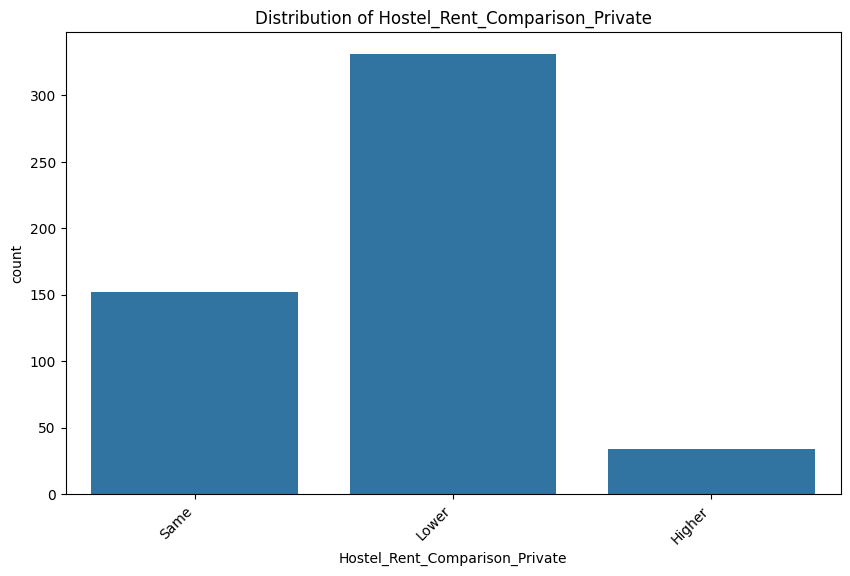

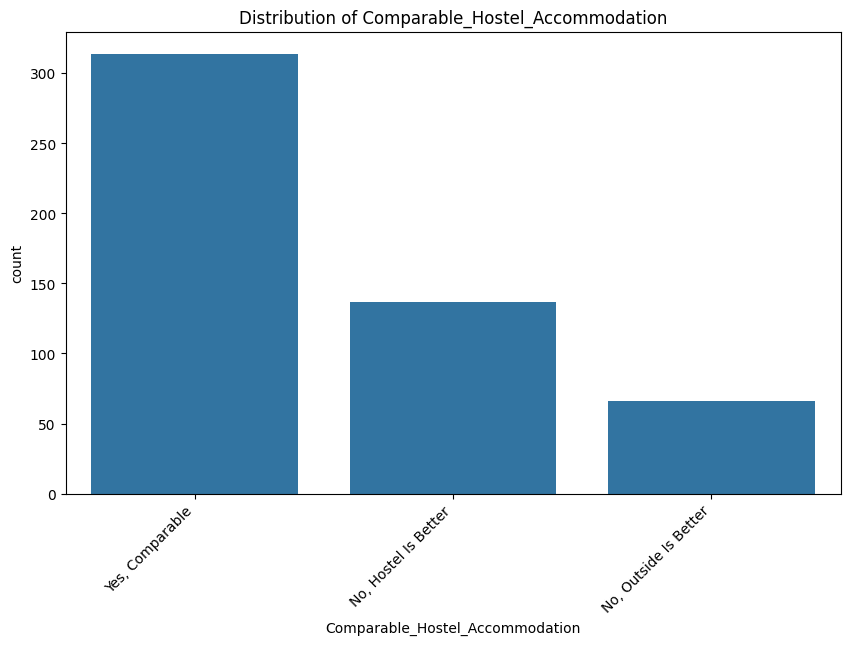

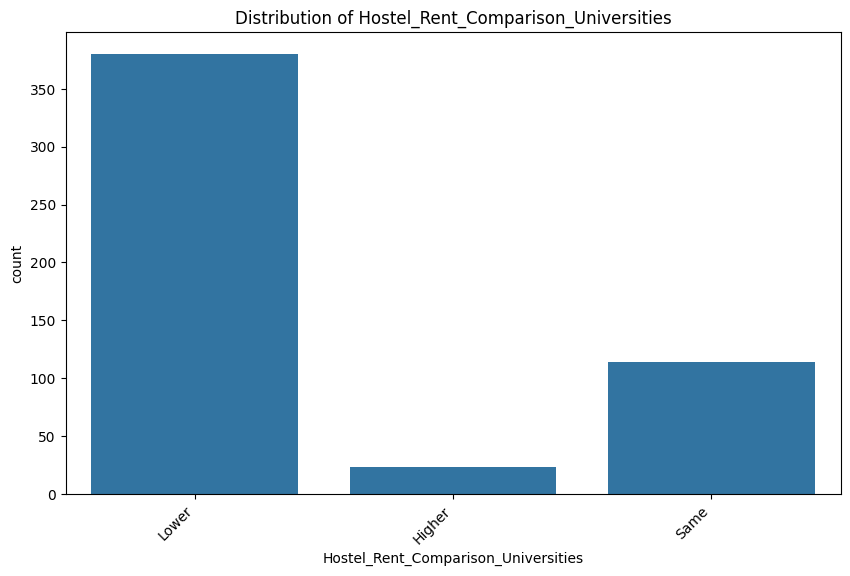

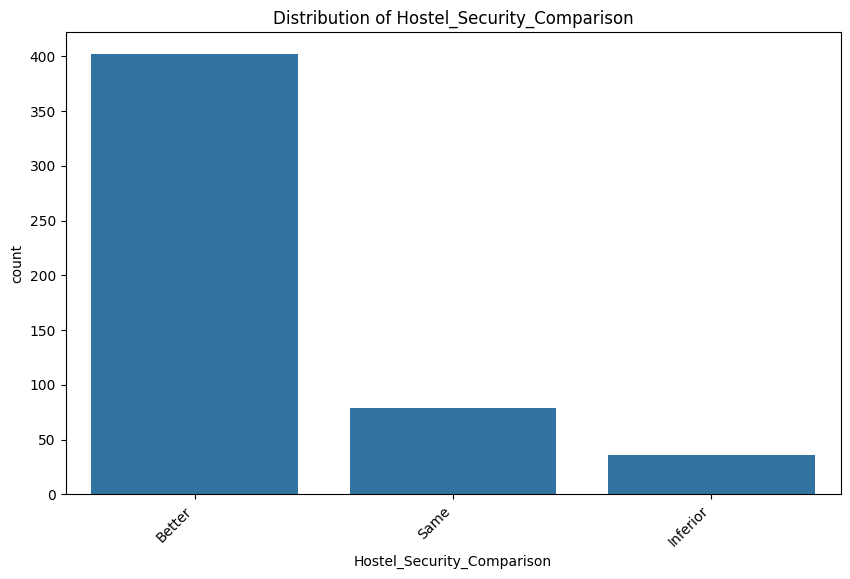

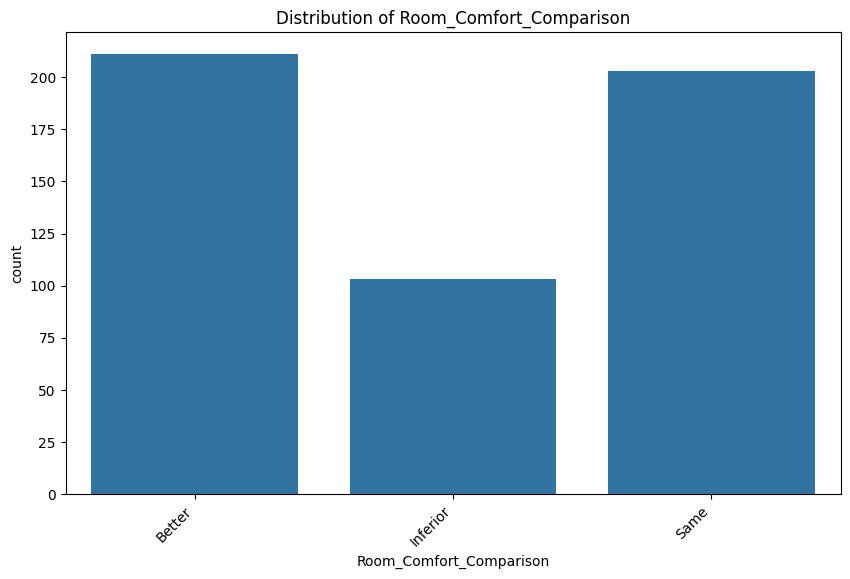

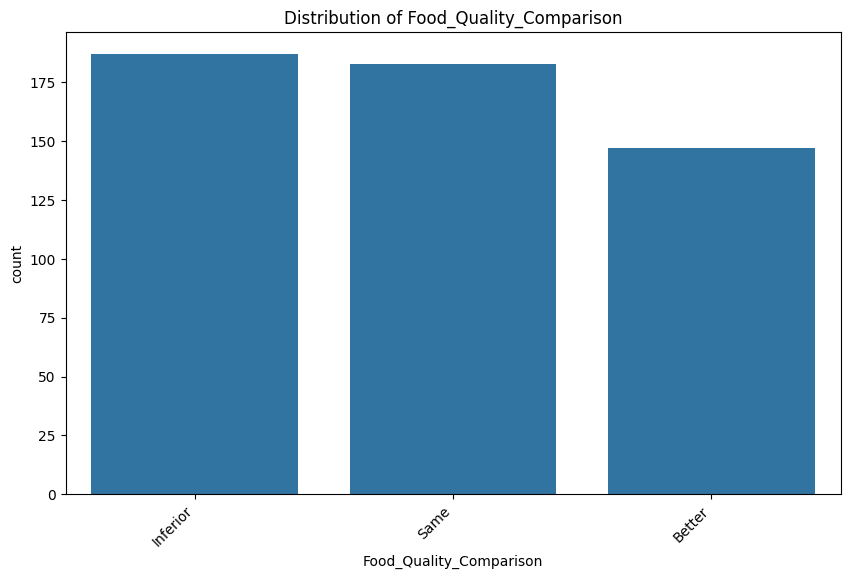

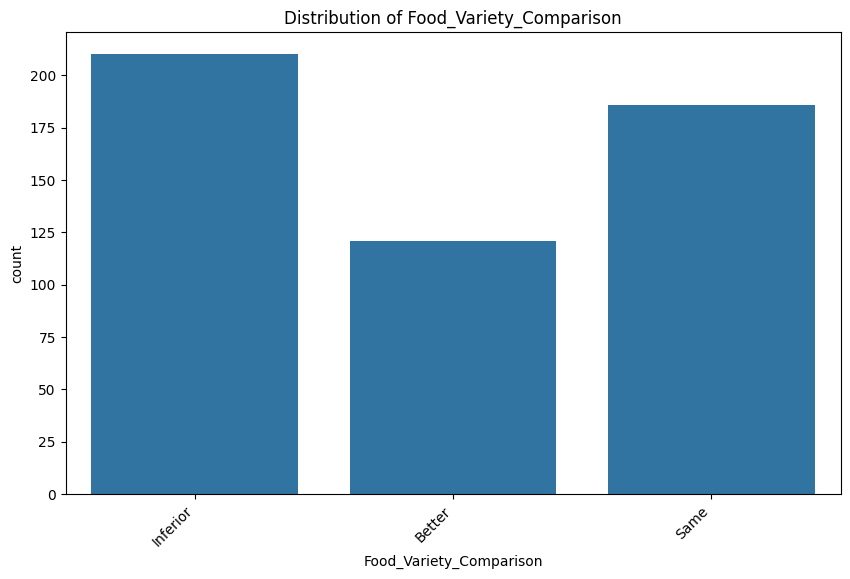

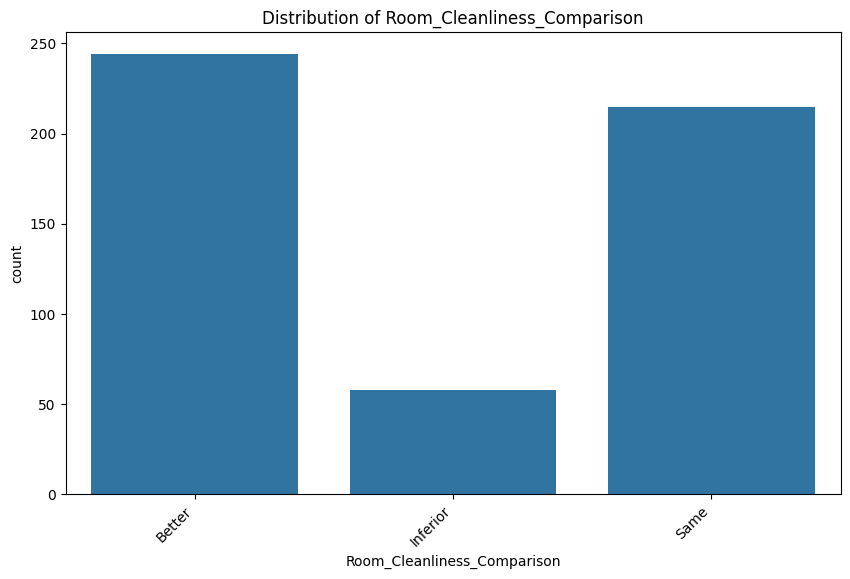

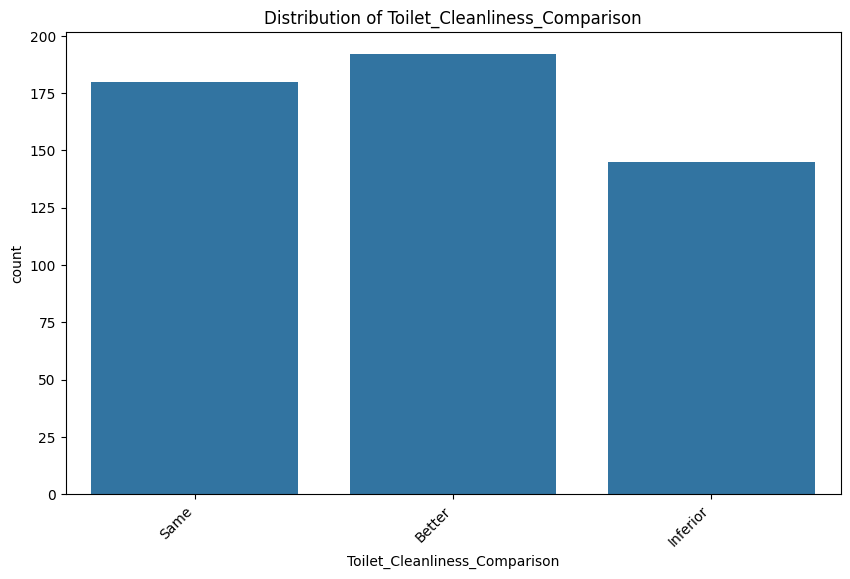

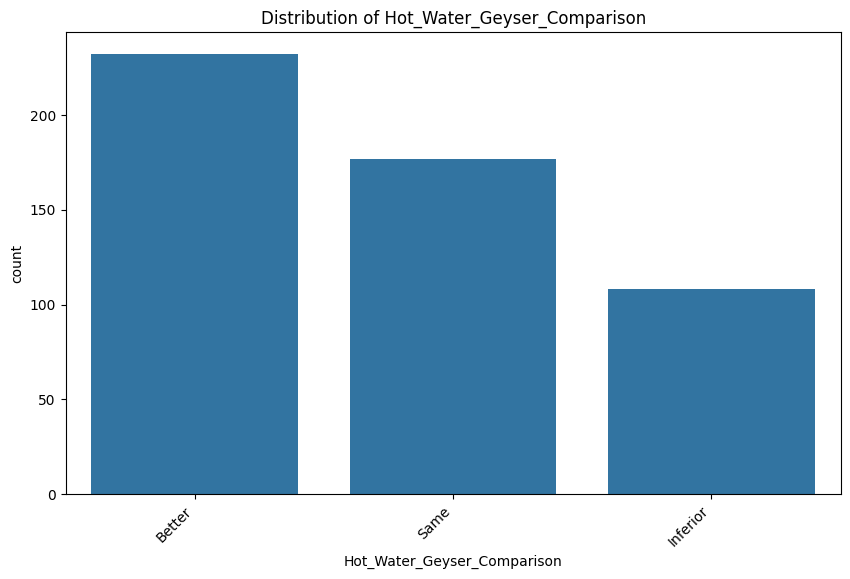

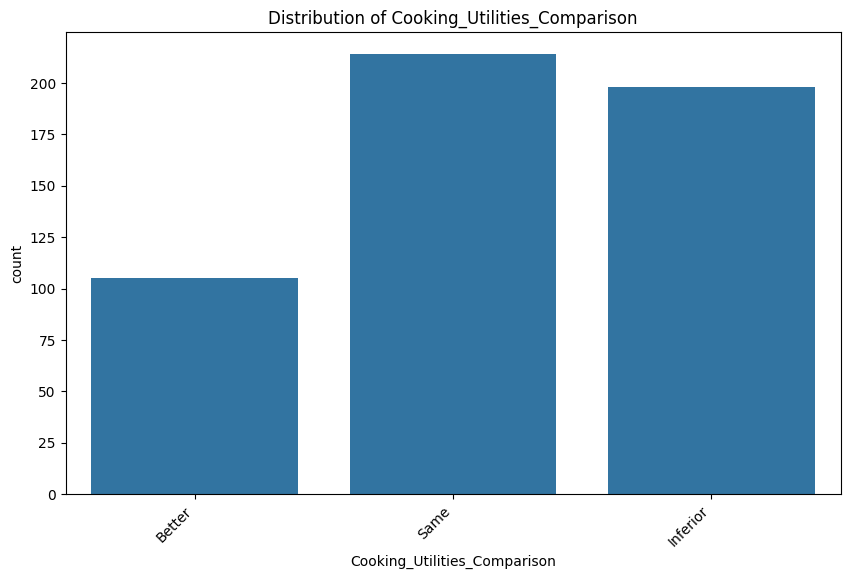

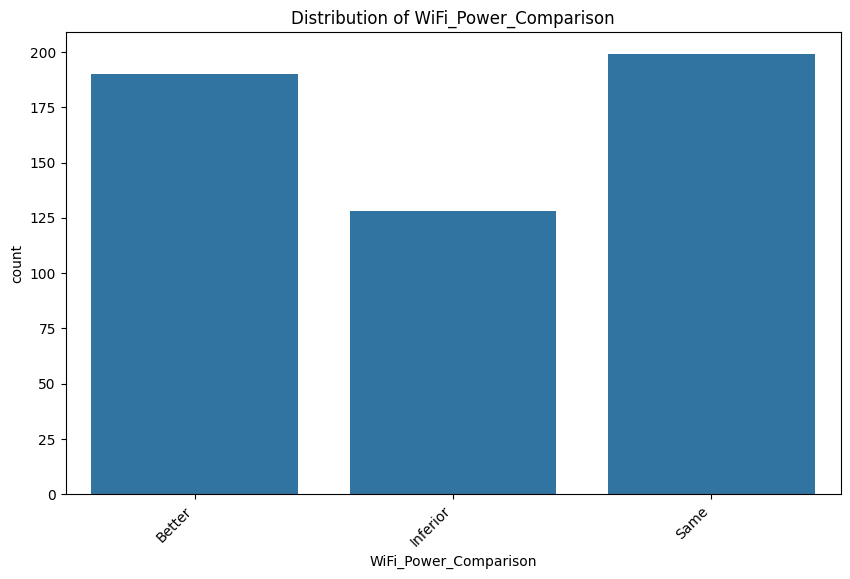

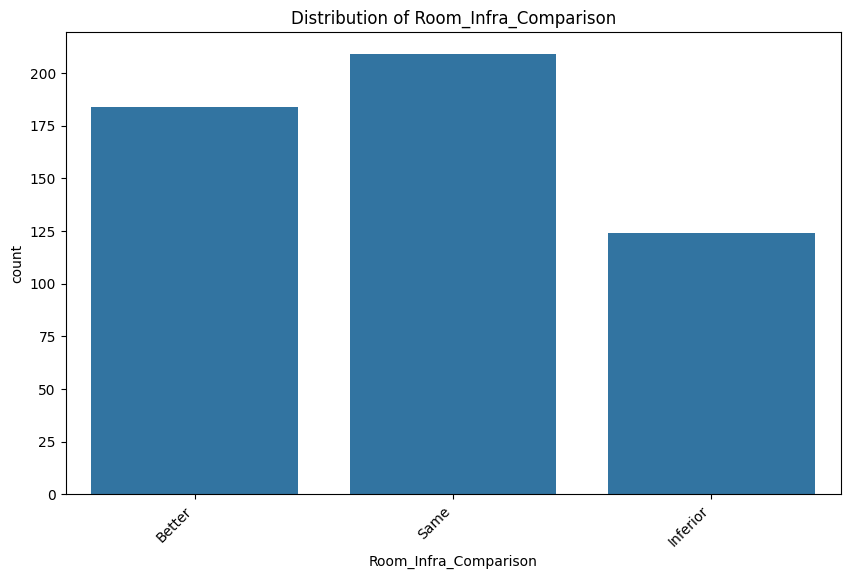

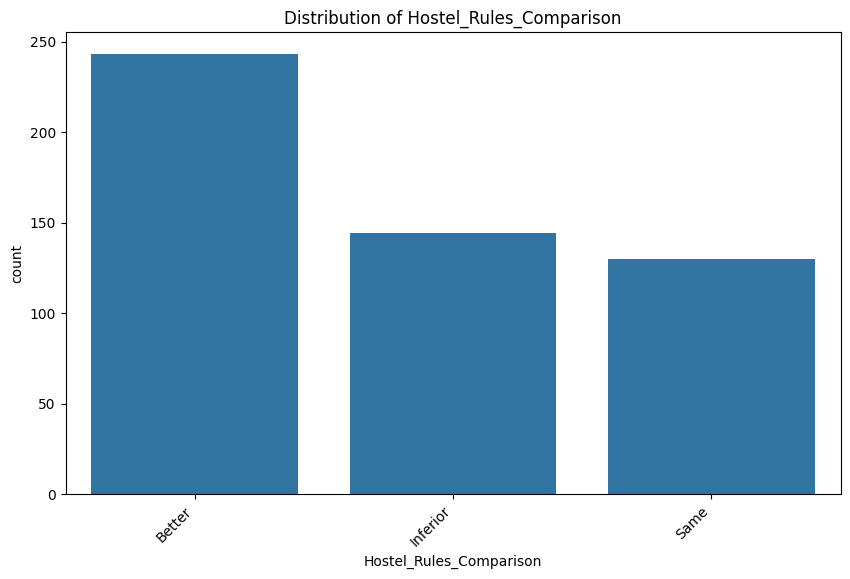

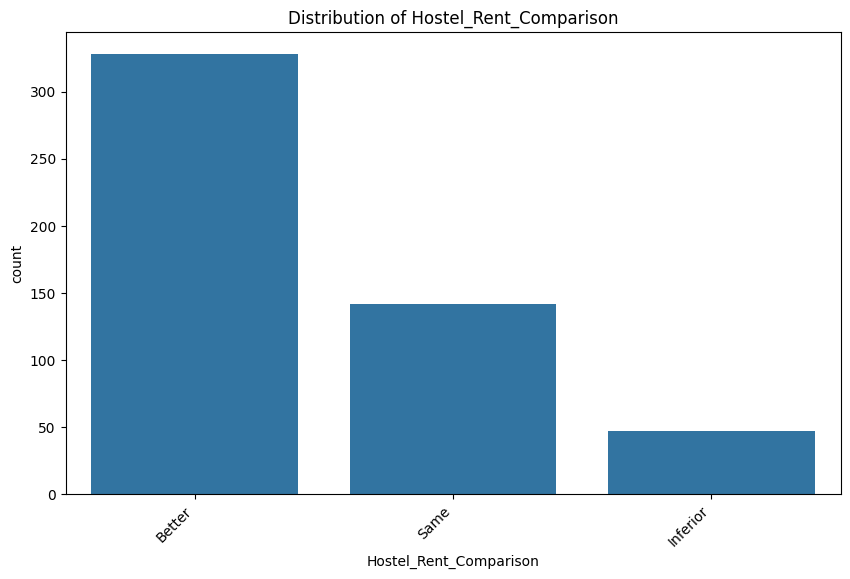

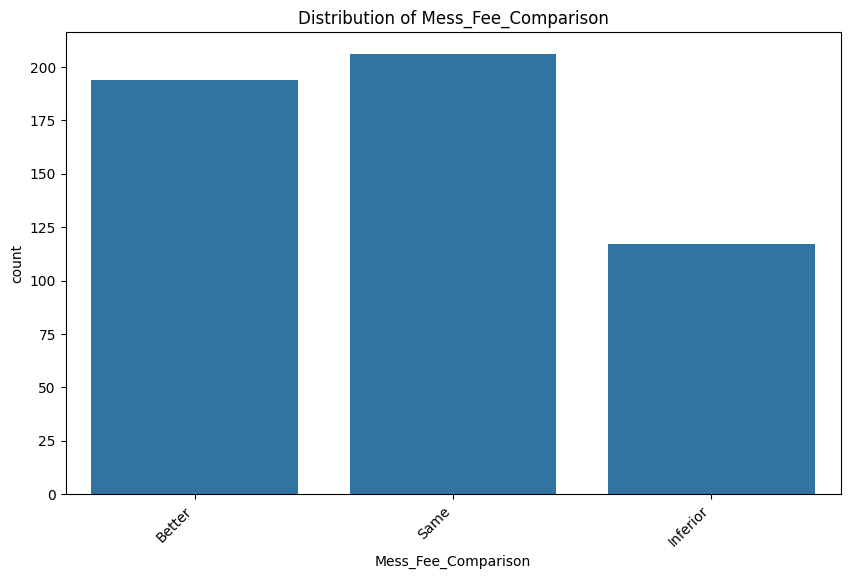

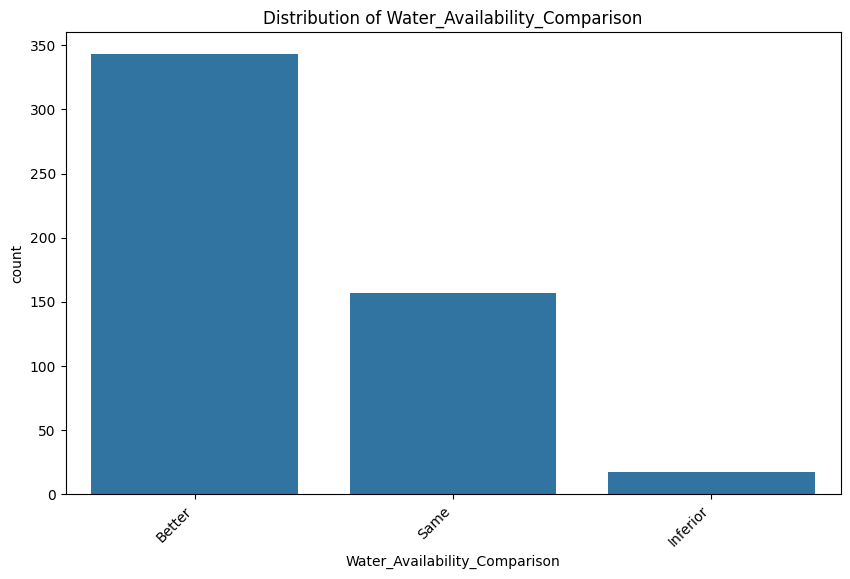

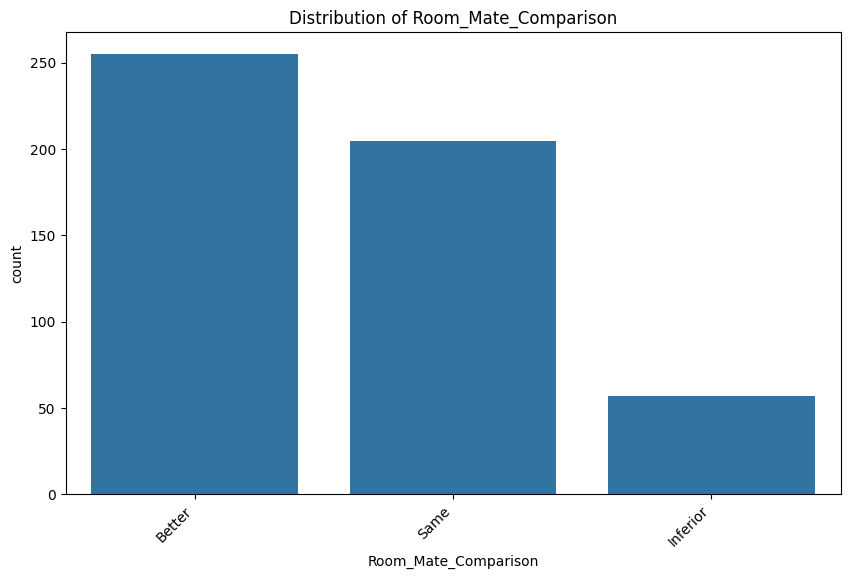

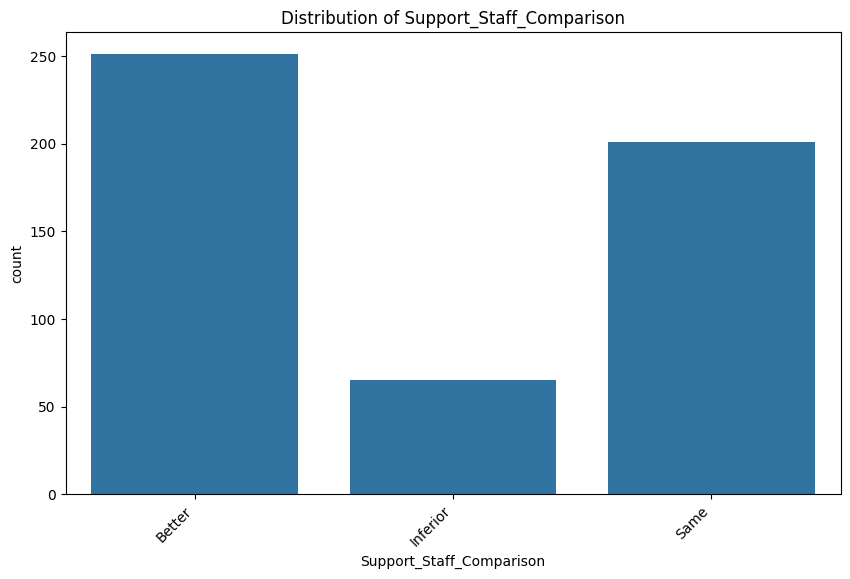

In [30]:
# 3. Distribution of categorical variables
categorical_columns = df1.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df1, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Pie Chart Visualization for Categorical Variables

In this section, we visualize the categorical variables using pie charts. Pie charts provide an easy-to-understand representation of how different categories contribute to the whole. Each slice of the pie represents a category, and the size of the slice corresponds to the proportion of that category.

Steps involved:
- **Plotting Pie Charts**: For each categorical column, we generate a pie chart using `value_counts()` to calculate the proportion of each category.
- **Customization**: We use `autopct='%1.1f%%'` to display the percentage values, and `startangle=140` to start the chart at a defined angle for better visualization. The colors are customized using Seaborn’s "pastel" color palette.

These pie charts allow us to quickly assess the relative proportions of different categories within the dataset.


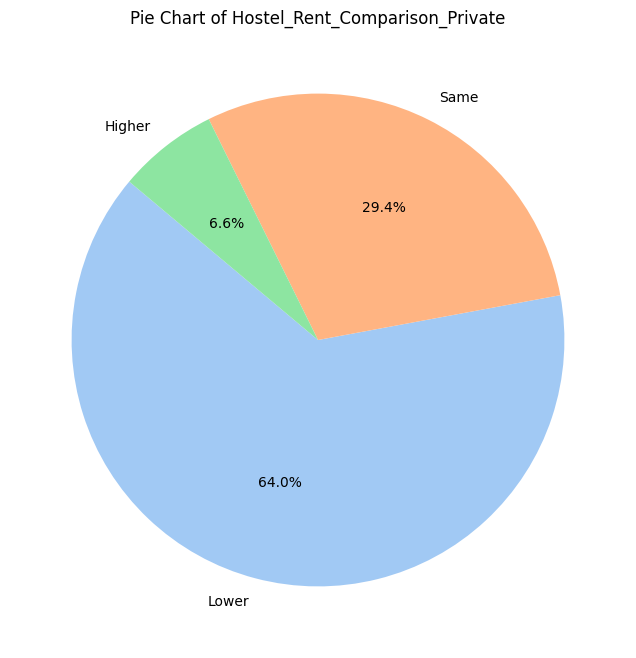

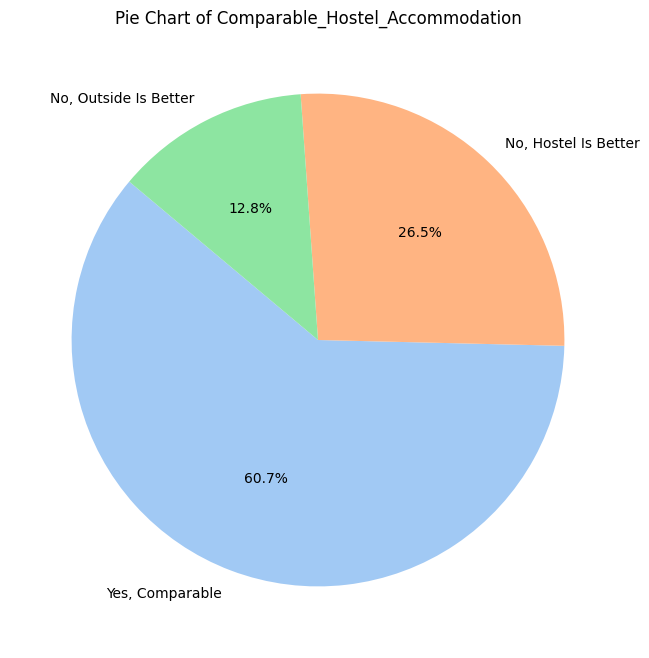

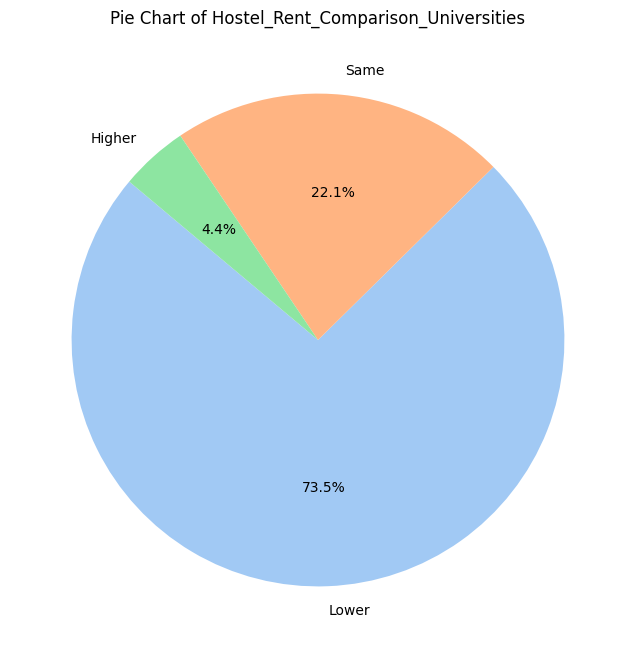

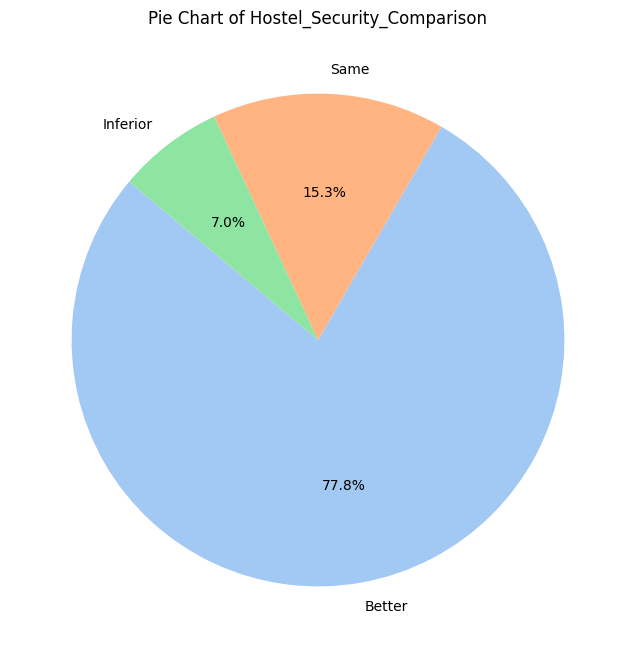

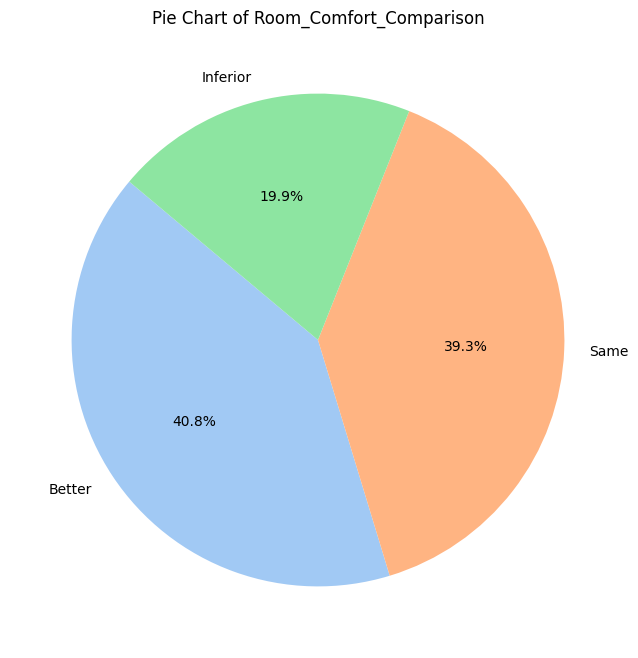

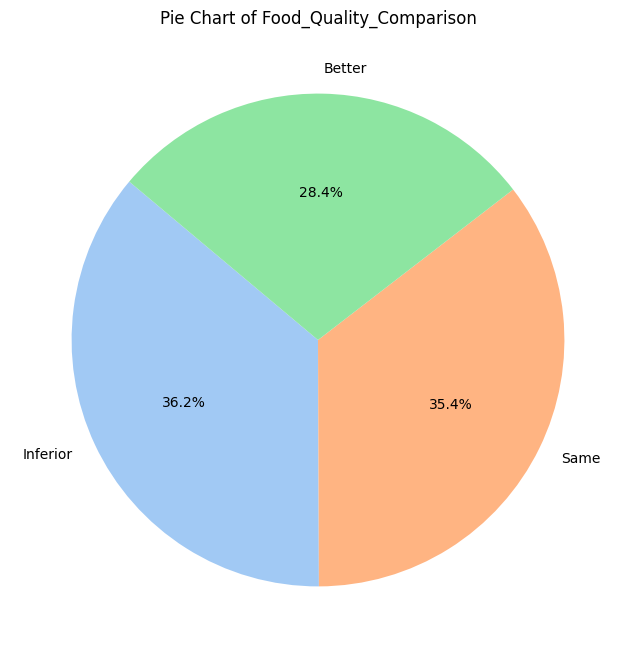

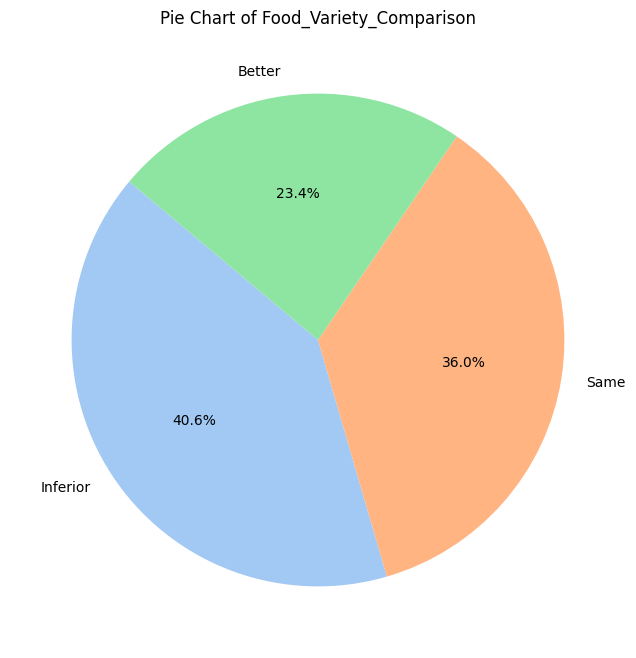

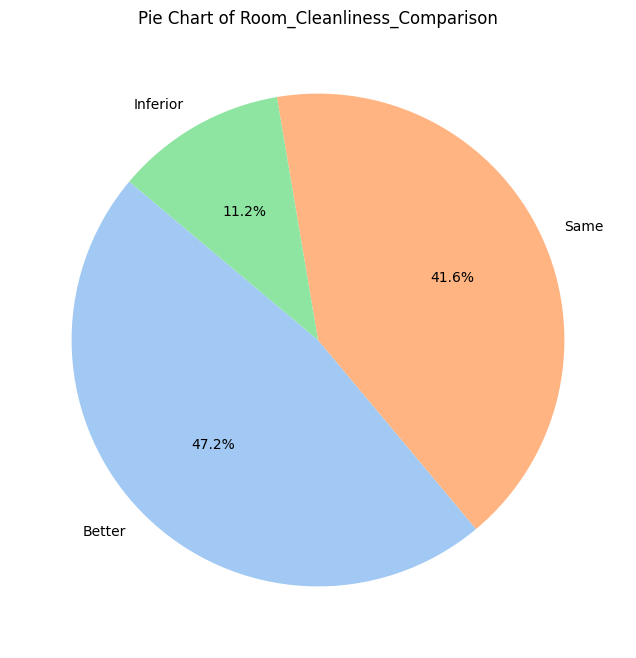

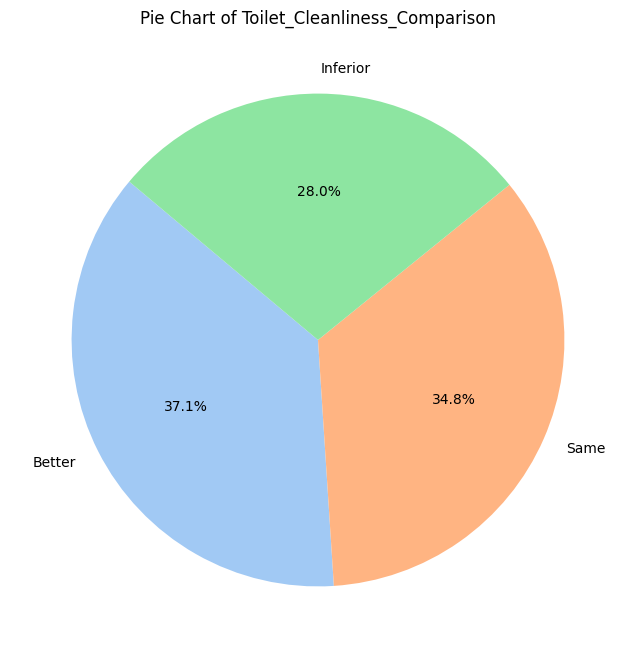

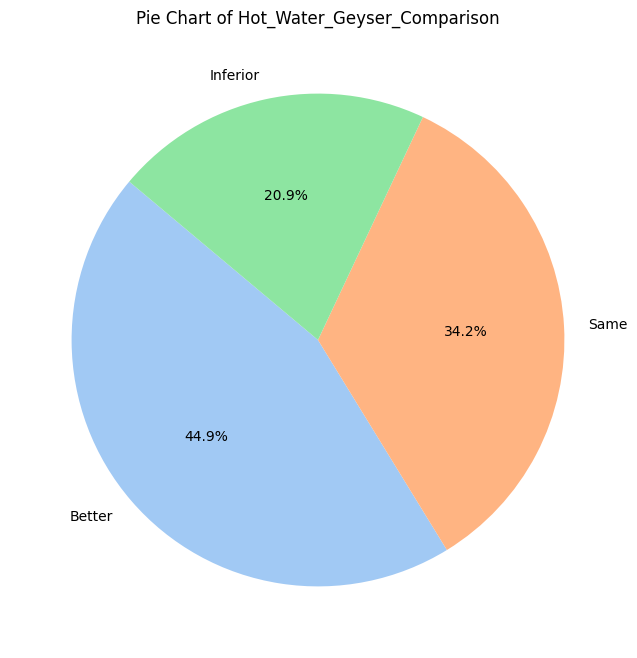

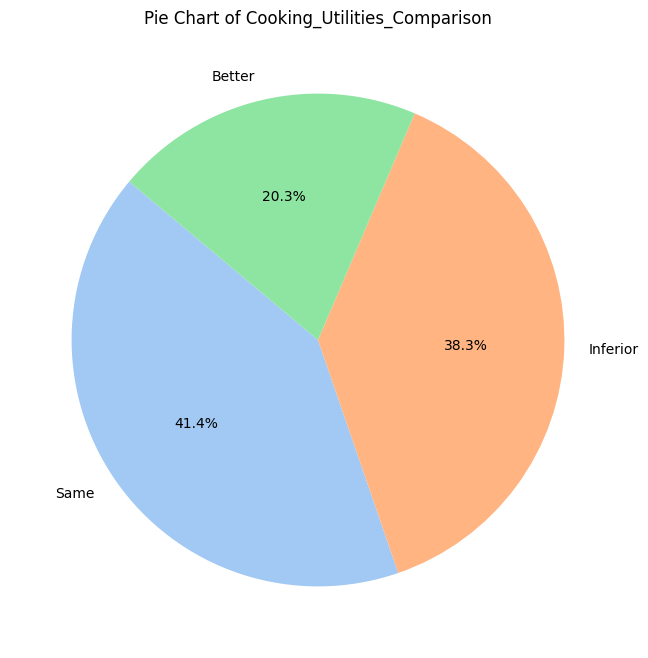

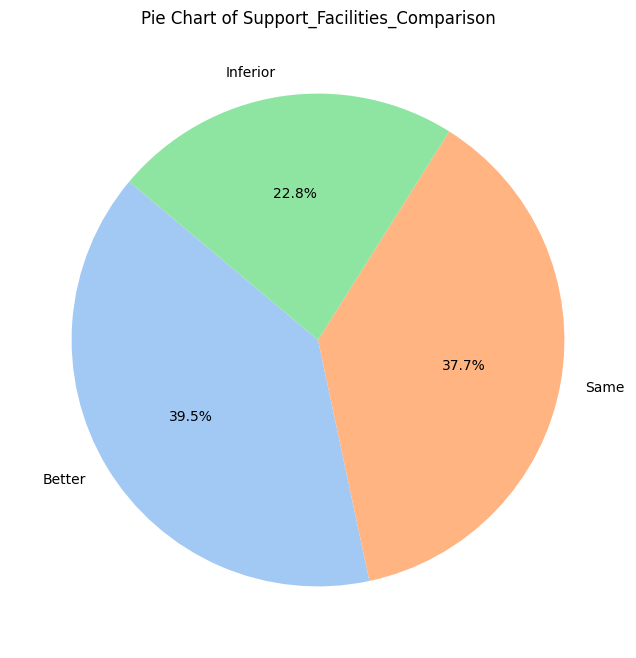

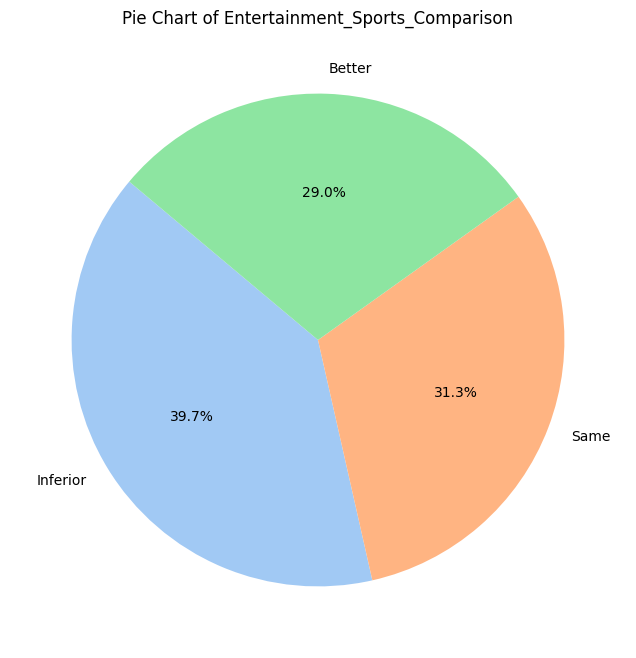

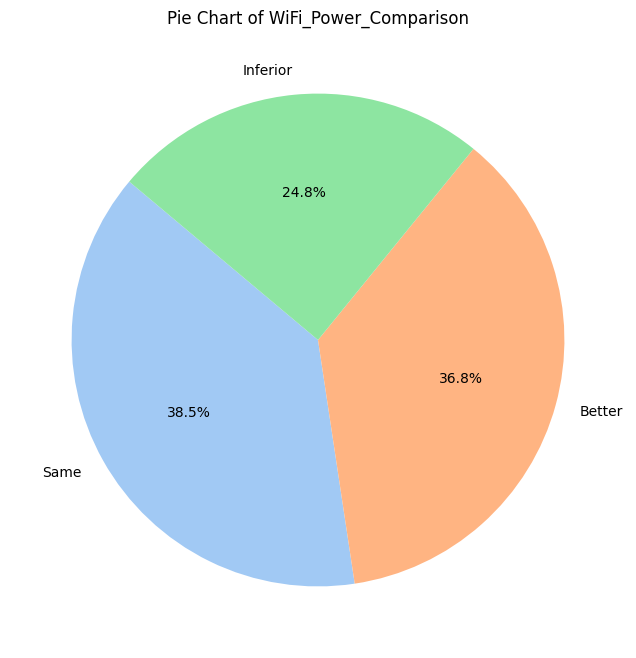

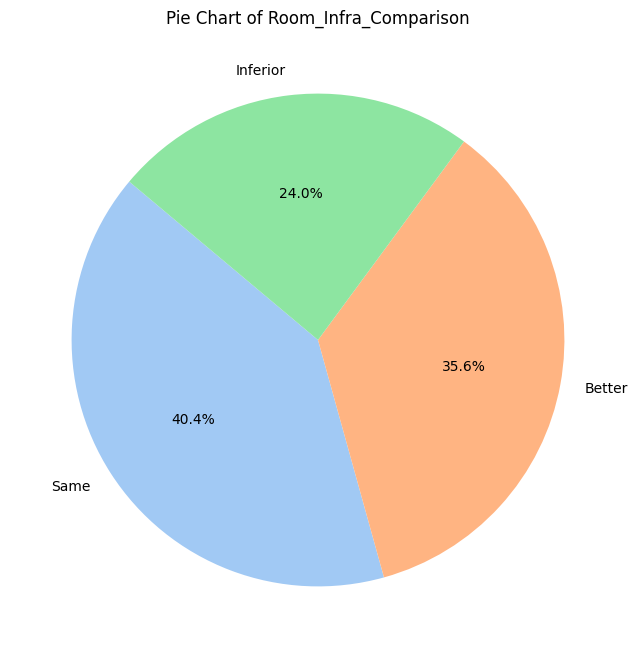

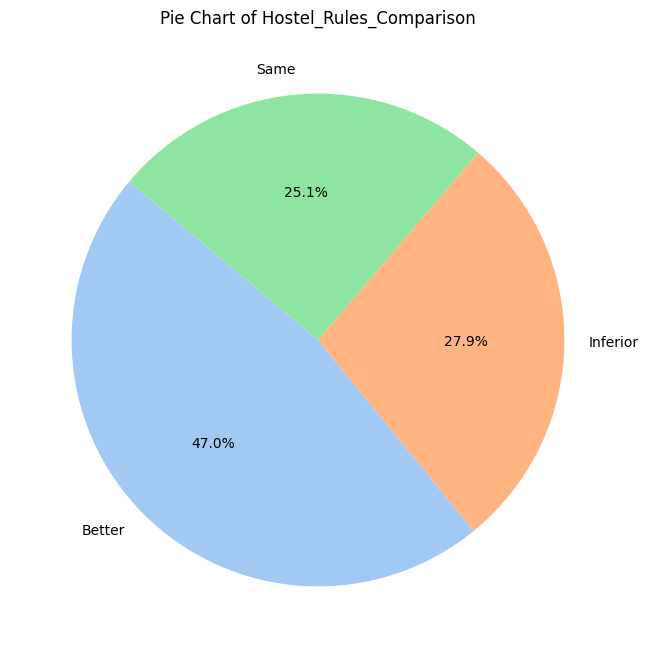

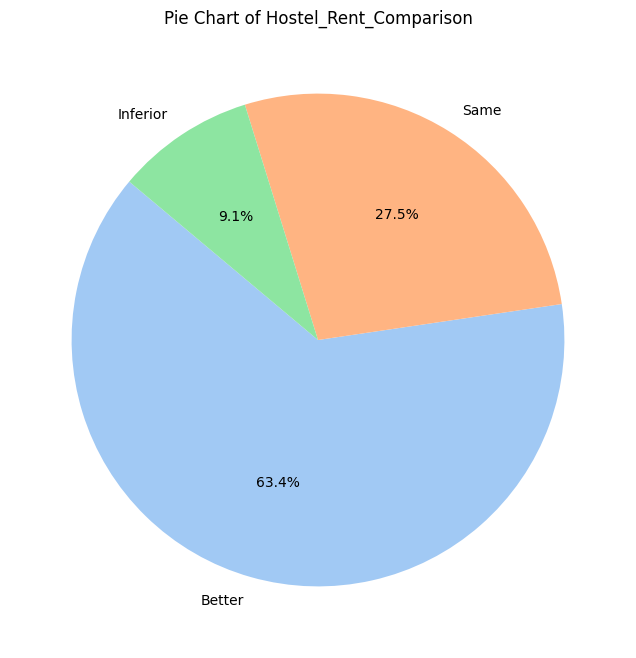

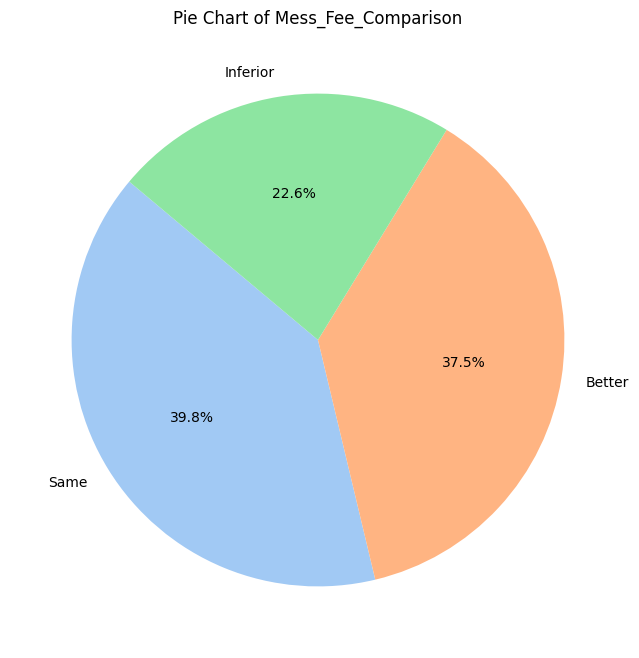

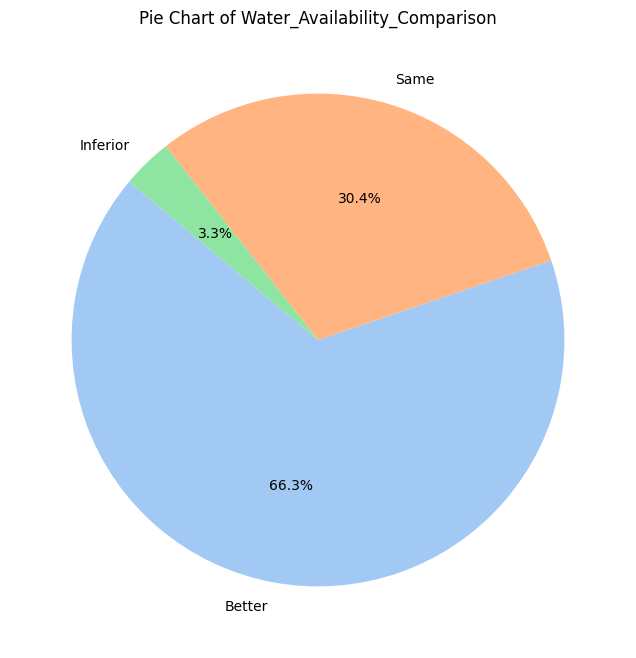

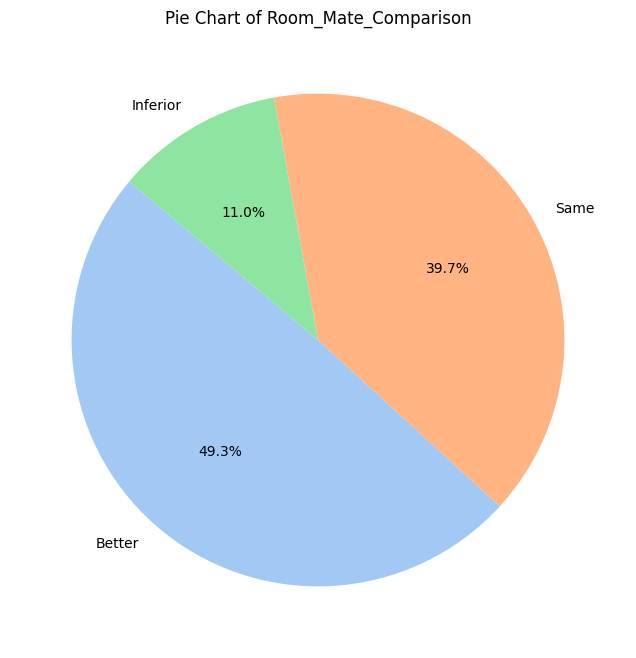

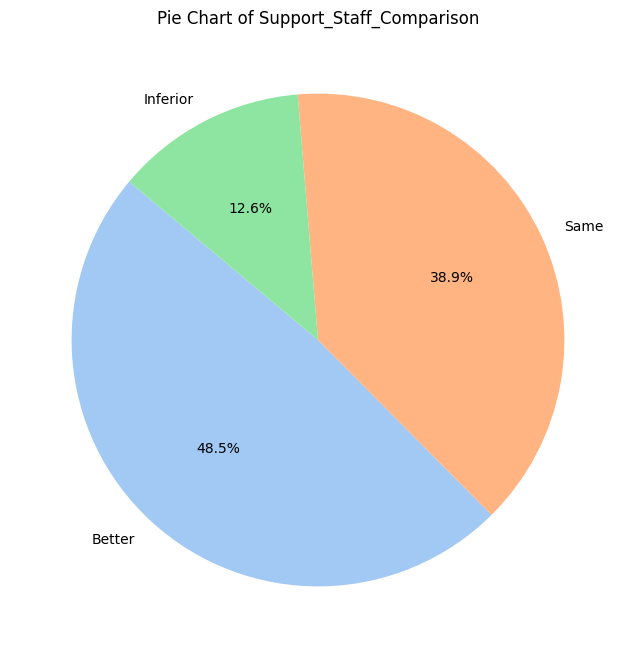

In [31]:
# 3.1 Pie chart for the categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 8))
    df1[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hides the y-label
    plt.show()

### Manually Mapping Categorical Variables to Numerical Values

In this step, we map categorical responses to numerical values to make the data suitable for further analysis, particularly for machine learning models that typically work with numerical inputs. The mapping process assigns a numeric value to each category based on its qualitative meaning:

- **Mapping 'Better', 'Same', and 'Inferior'**: 
  - 'Better' is mapped to 1, 
  - 'Same' is mapped to 0, 
  - 'Inferior' is mapped to -1.
  
- **Mapping 'Yes, Comparable', 'No, Hostel Is Better', and 'No, Outside Is Better'**:
  - 'Yes, Comparable' is mapped to 1, 
  - 'No, Hostel Is Better' is mapped to 0, 
  - 'No, Outside Is Better' is mapped to -1.

- **Mapping 'Higher', 'Same', and 'Lower'**: 
  - 'Higher' is mapped to 1, 
  - 'Same' is mapped to 0, 
  - 'Lower' is mapped to -1.

By converting these categorical values into numerical equivalents, we can perform operations like statistical analysis, modeling, or correlation analysis more easily.


In [33]:
# Manually mapping categories to numbers
mapping = {'Better': 1, 'Same': 0, 'Inferior': -1}
df1['Hostel_Security_Comparison'] = df1['Hostel_Security_Comparison'].map(mapping)
df1['Room_Comfort_Comparison'] = df1['Room_Comfort_Comparison'].map(mapping)
df1['Food_Quality_Comparison'] = df1['Food_Quality_Comparison'].map(mapping)
df1['Food_Variety_Comparison'] = df1['Food_Variety_Comparison'].map(mapping)
df1['Room_Cleanliness_Comparison'] = df1['Room_Cleanliness_Comparison'].map(mapping)
df1['Toilet_Cleanliness_Comparison'] = df1['Toilet_Cleanliness_Comparison'].map(mapping)
df1['Hot_Water_Geyser_Comparison'] = df1['Hot_Water_Geyser_Comparison'].map(mapping)
df1['Cooking_Utilities_Comparison'] = df1['Cooking_Utilities_Comparison'].map(mapping)
df1['Support_Facilities_Comparison'] = df1['Support_Facilities_Comparison'].map(mapping)
df1['Entertainment_Sports_Comparison'] = df1['Entertainment_Sports_Comparison'].map(mapping)
df1['WiFi_Power_Comparison'] = df1['WiFi_Power_Comparison'].map(mapping)
df1['Room_Infra_Comparison'] = df1['Room_Infra_Comparison'].map(mapping)
df1['Hostel_Rules_Comparison'] = df1['Hostel_Rules_Comparison'].map(mapping)
df1['Hostel_Rent_Comparison'] = df1['Hostel_Rent_Comparison'].map(mapping)
df1['Mess_Fee_Comparison'] = df1['Mess_Fee_Comparison'].map(mapping)
df1['Water_Availability_Comparison'] = df1['Water_Availability_Comparison'].map(mapping)
df1['Room_Mate_Comparison'] = df1['Room_Mate_Comparison'].map(mapping)
df1['Support_Staff_Comparison'] = df1['Support_Staff_Comparison'].map(mapping)

mapping1 = {'Yes, Comparable': 1,'No, Hostel Is Better':0, 'No, Outside Is Better': -1}
df1['Comparable_Hostel_Accommodation'] = df1['Comparable_Hostel_Accommodation'].map(mapping1)

mapping2 = {'Higher':1, 'Same':0, 'Lower':-1}
df1['Hostel_Rent_Comparison_Private'] = df1['Hostel_Rent_Comparison_Private'].map(mapping2)
df1['Hostel_Rent_Comparison_Universities'] = df1['Hostel_Rent_Comparison_Universities'].map(mapping2)

In [34]:
df1.head()

Hostel_Rent_Comparison_Private  Comparable_Hostel_Accommodation  \
0                               0                                1   
1                              -1                                1   
2                               1                                1   
3                              -1                                1   
4                               0                                1   

   Hostel_Rent_Comparison_Universities  Hostel_Security_Comparison  \
0                                   -1                           1   
1                                   -1                           1   
2                                    1                           1   
3                                   -1                           1   
4                                   -1                           1   

   Room_Comfort_Comparison  Food_Quality_Comparison  Food_Variety_Comparison  \
0                        1                       -1                       -1   
1                        1                        0                        1   
2                        1                        1                        1   
3                       -1                       -1                       -1   
4                        0                        0                        0   

   Room_Cleanliness_Comparison  Toilet_Cleanliness_Comparison  \
0                            1                              0   
1                            1                              1   
2                            1                              0   
3                           -1                             -1   
4                            1                              0   

   Hot_Water_Geyser_Comparison  ...  Support_Facilities_Comparison  \
0                            1  ...                              1   
1                            1  ...                             -1   
2                            1  ...                              1   
3                            1  ...                              0   
4                            1  ...                              1   

   Entertainment_Sports_Comparison  WiFi_Power_Comparison  \
0                                1                      1   
1                               -1                     -1   
2                                1                      1   
3                               -1                      0   
4                                0                     -1   

   Room_Infra_Comparison  Hostel_Rules_Comparison  Hostel_Rent_Comparison  \
0                      1                        1                       1   
1                      0                       -1                       0   
2                      1                        1                       0   
3                     -1                       -1                       1   
4                      0                        1                       0   

   Mess_Fee_Comparison  Water_Availability_Comparison  Room_Mate_Comparison  \
0                    1                              1                     1   
1                    1                              0                     1   
2                    0                              1                     1   
3                    1                              0                     1   
4                   -1                              1                     1   

   Support_Staff_Comparison  
0                         1  
1                        -1  
2                         1  
3                         0  
4                         1  

[5 rows x 21 columns]

In [35]:
correlation_matrix = df1.corr()

### Heatmap of the Correlation Matrix

In this step, we visualize the correlation matrix of the dataset after converting categorical variables to numerical values. A correlation matrix shows the linear relationship between pairs of variables. Each cell in the matrix contains the correlation coefficient, which can range from -1 (perfect negative correlation) to 1 (perfect positive correlation).

To effectively visualize the correlation matrix:
- **Heatmap**: We use `sns.heatmap()` to create a heatmap, where the intensity of the color represents the strength of the correlation.
- **Customization**: The heatmap is styled using the `coolwarm` color palette, which highlights positive and negative correlations. The color bar on the side provides a reference for the strength of correlations.

This visualization helps to quickly identify strong correlations between variables and spot multicollinearity, which can affect certain types of statistical models.


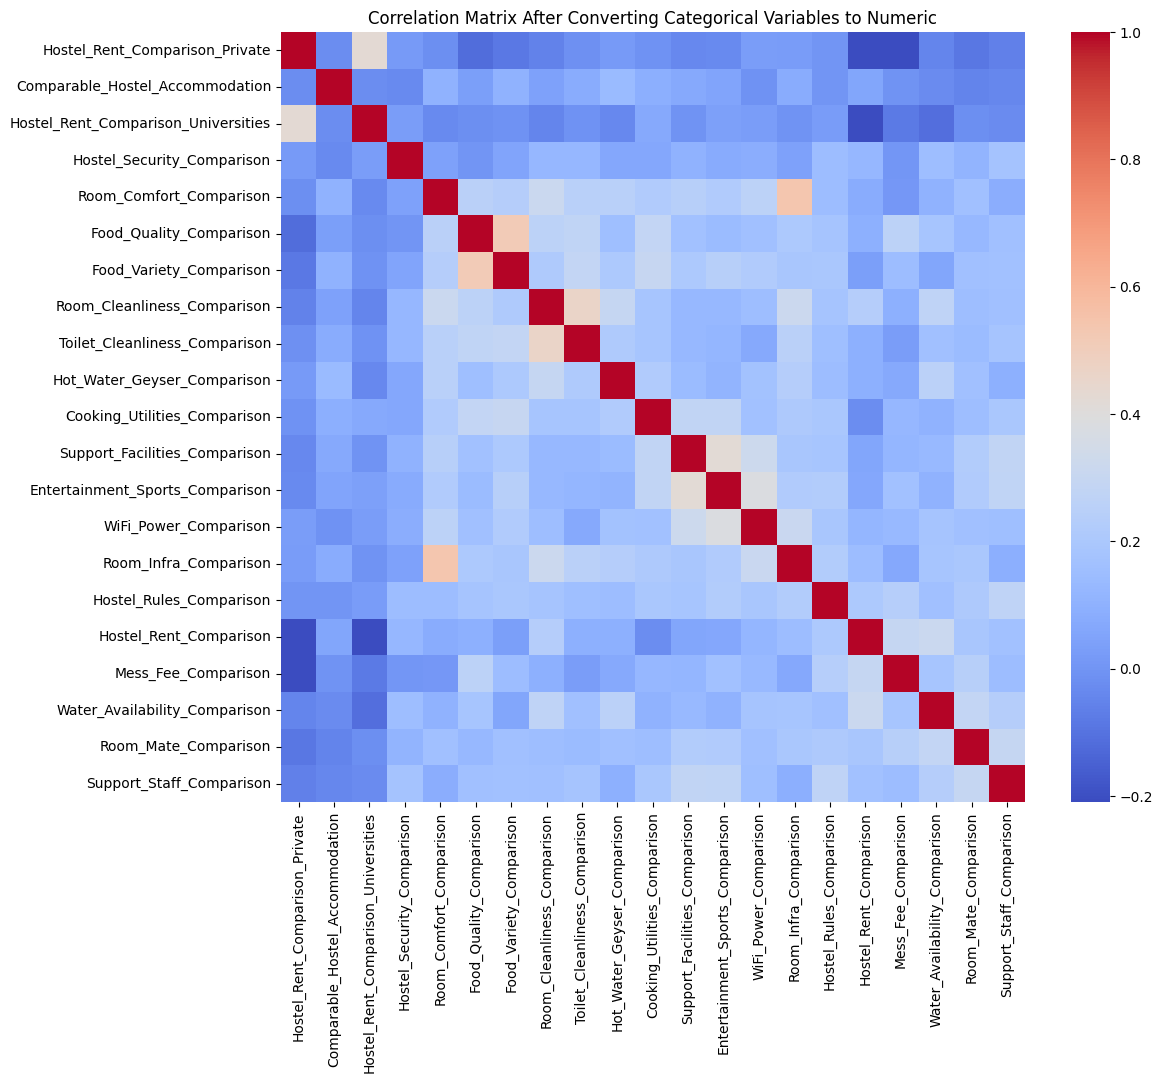

In [36]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix After Converting Categorical Variables to Numeric')
plt.show()

## Box Plot Visualization of Numeric Columns

This Python code is used to visualize potential outliers in numeric columns of a DataFrame (`df1`) using box plots. The visualization helps in detecting data points that fall outside the typical range of the dataset, providing insights into the spread and distribution of numerical features.

### Code Explanation:

1. **Importing Libraries:**
   - `matplotlib.pyplot` and `seaborn` are imported to create and display plots. These are popular libraries for data visualization in Python.

2. **Selecting Numeric Columns:**
   - `df1.select_dtypes(include='number').columns` selects only the numeric columns from the DataFrame `df1`. This is necessary as box plots are typically used for numerical data.

3. **Creating a Box Plot:**
   - `plt.figure(figsize=(15, 8))` sets the figure size for the plot, ensuring that all the box plots are clearly visible.
   - `df1[numeric_columns].boxplot()` creates a box plot for each selected numeric column in `df1`.
   
4. **Adding a Title and Adjusting X-axis Labels:**
   - `plt.title('Box Plot for Multiple Columns')` adds a title to the plot.
   - `plt.xticks(rotation=45)` rotates the labels of the x-axis by 45 degrees for better readability, especially when there are many columns.

5. **Displaying the Plot:**
   - `plt.show()` renders the plot, displaying the box plots for all the numeric columns in `df1`.

### Use Case:
This code is useful when you want to check the distribution of multiple numerical features and identify any outliers that may need further investigation or preprocessing.


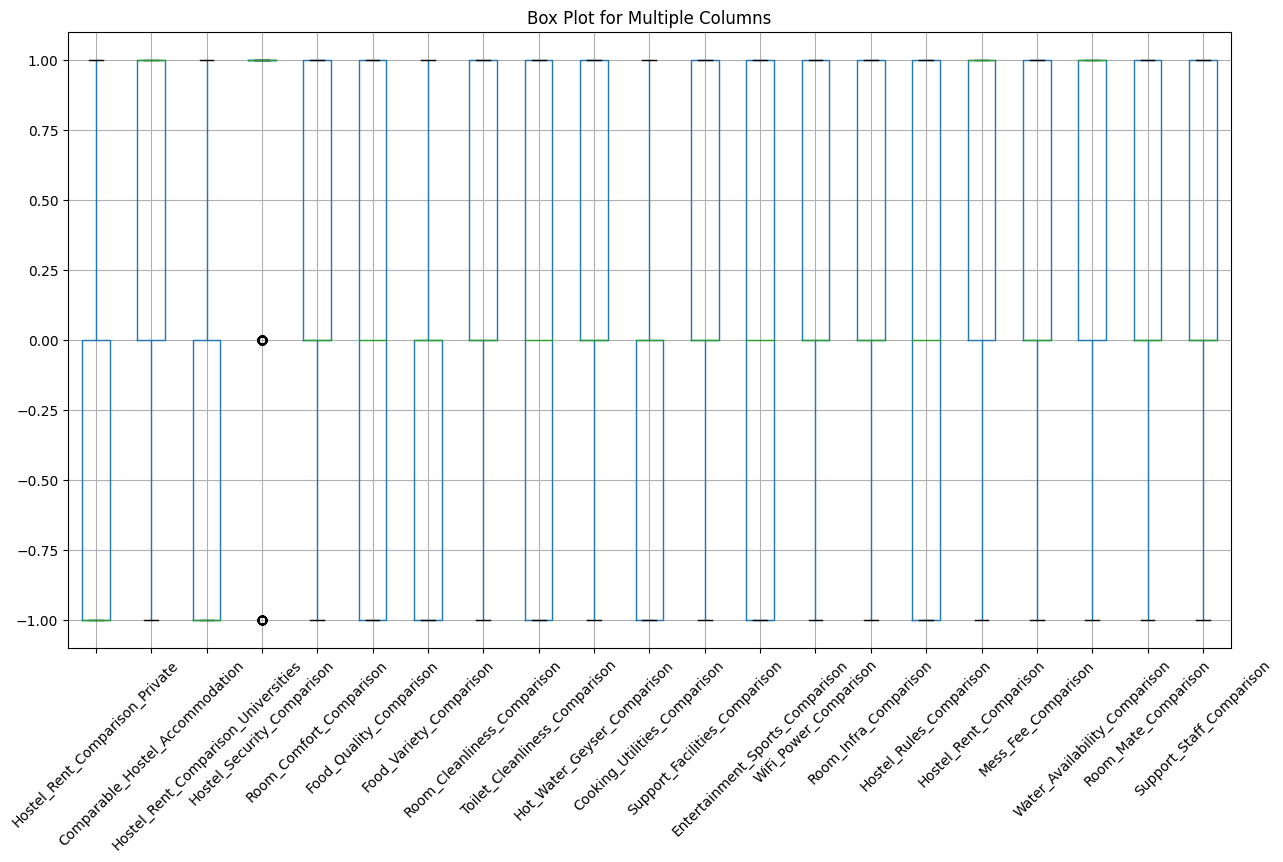

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for which you want to visualize outliers
numeric_columns = df1.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(15, 8))
df1[numeric_columns].boxplot()
plt.title('Box Plot for Multiple Columns')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


## Looping through Numeric Columns to Plot Individual Box Plots

This Python code loops through all the numeric columns in a DataFrame (`df1`) and generates individual box plots for each column. This approach allows for a more detailed view of the distribution and potential outliers for each feature.

### Code Explanation:

1. **Looping Through Numeric Columns:**
   - The `for` loop iterates through each numeric column in `numeric_columns`, which was previously defined by selecting numeric data types from `df1`.
   
2. **Creating a Box Plot for Each Column:**
   - For each column, a new figure is created using `plt.figure(figsize=(8, 6))`, which defines the plot size to ensure the plot fits well on the screen.
   - `sns.boxplot(df1[column])` uses Seaborn's box plot functionality to visualize the distribution of values in the current column. Each box plot shows the median, quartiles, and potential outliers for that specific feature.
   
3. **Adding a Title:**
   - `plt.title(f'Box Plot for {column}')` dynamically creates a title for each plot, showing the name of the column being visualized.
   
4. **Displaying the Plot:**
   - `plt.show()` renders the plot, displaying it before moving to the next column.

### Use Case:
This code is ideal when you want to inspect each numeric column's distribution separately, allowing for a detailed analysis of each feature's outliers and spread.


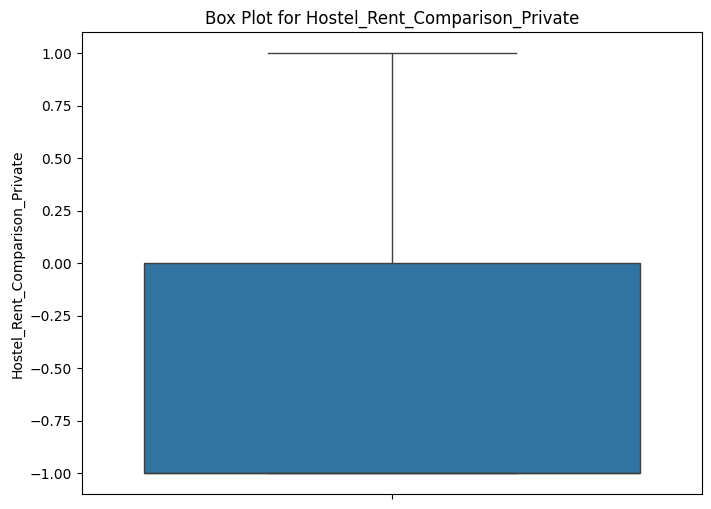

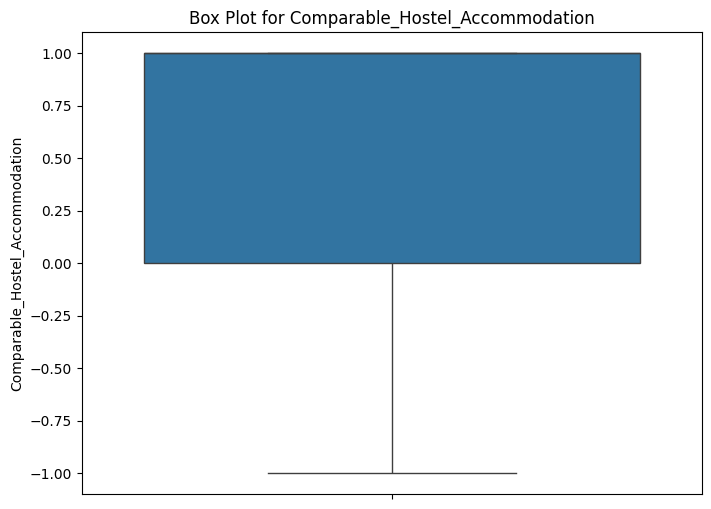

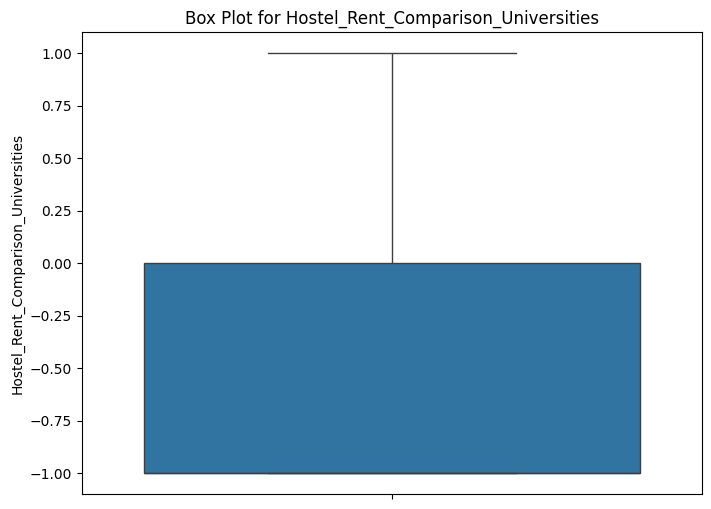

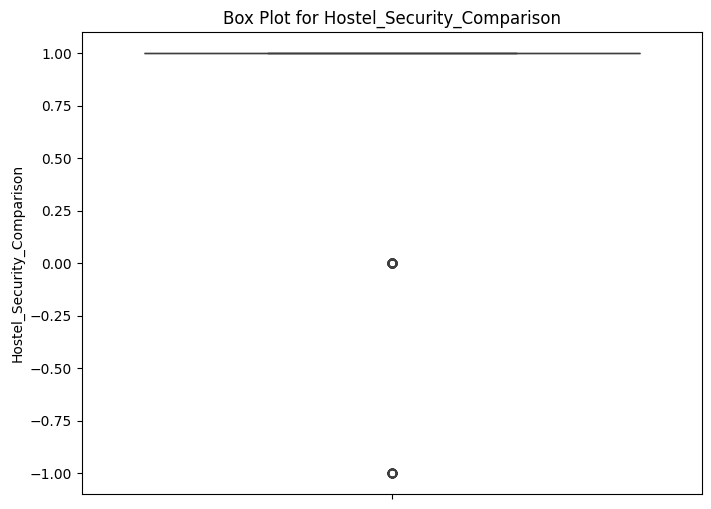

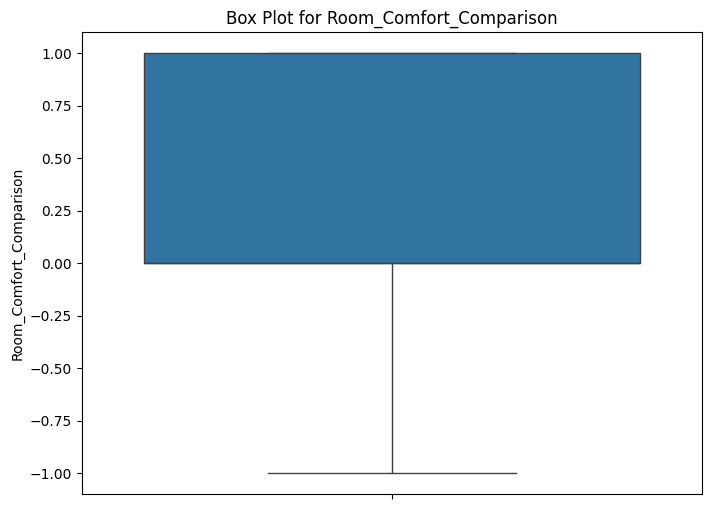

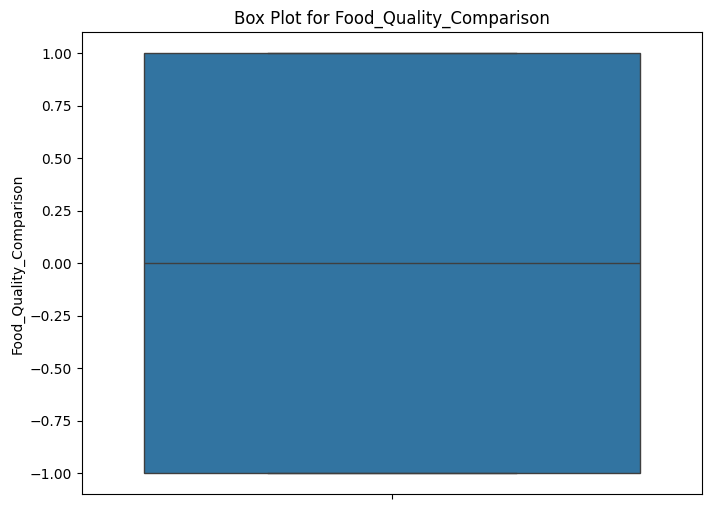

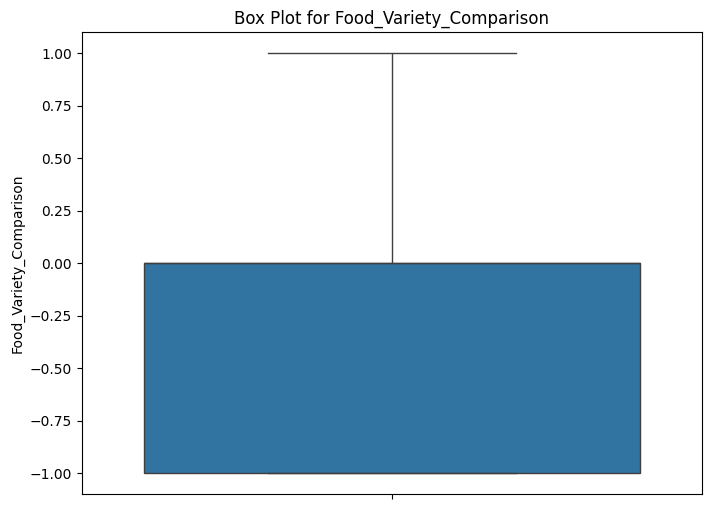

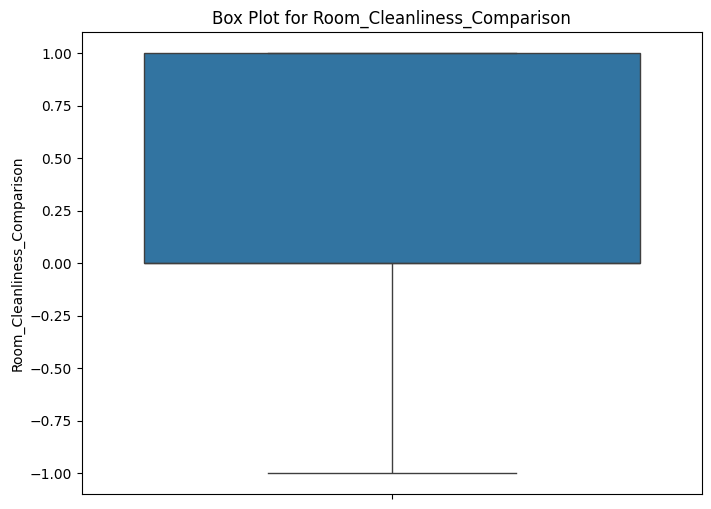

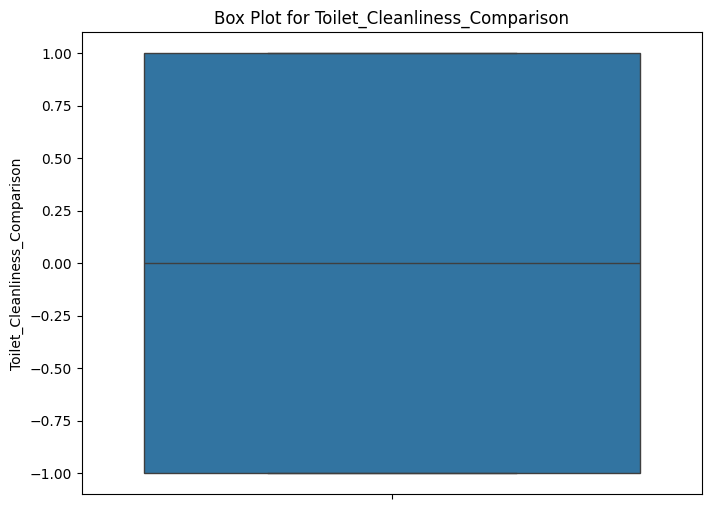

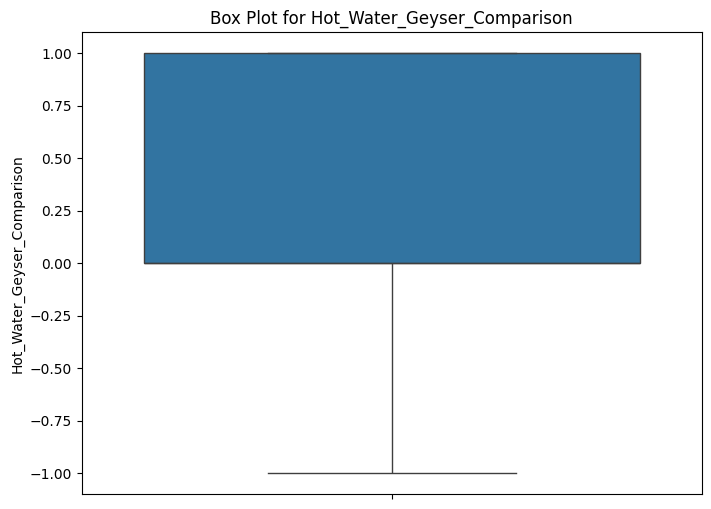

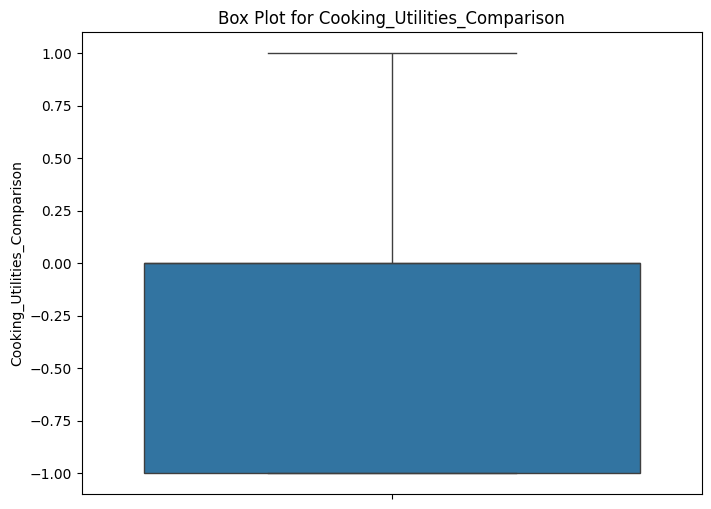

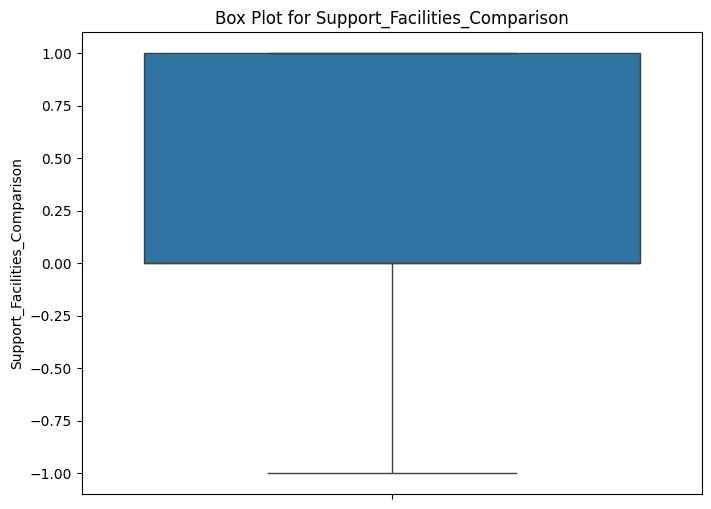

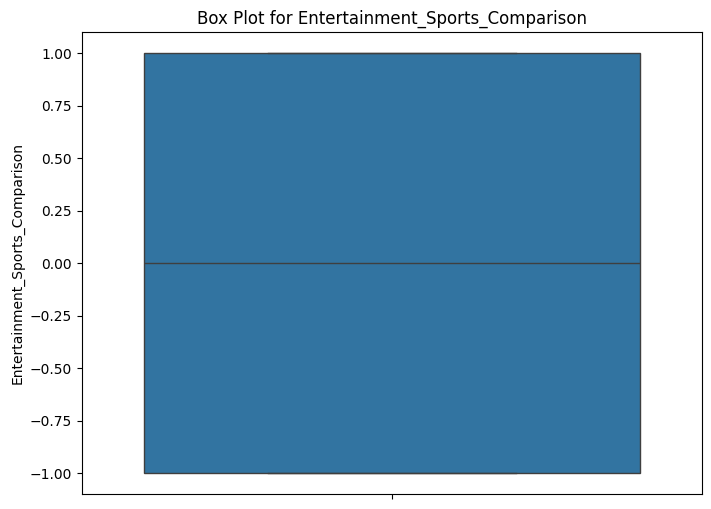

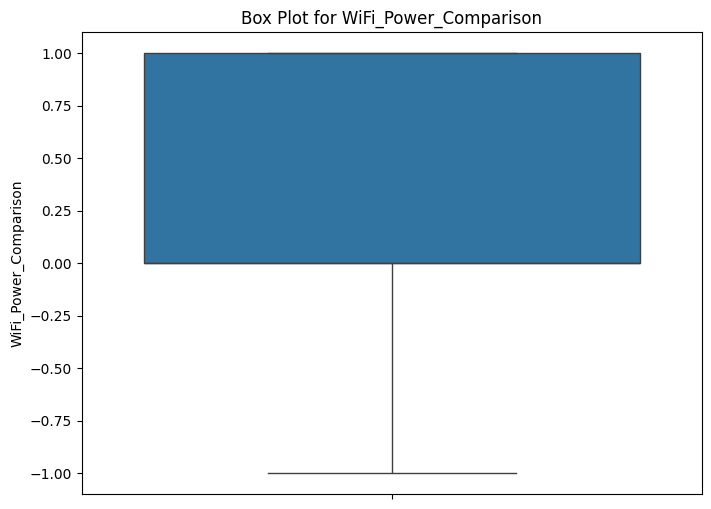

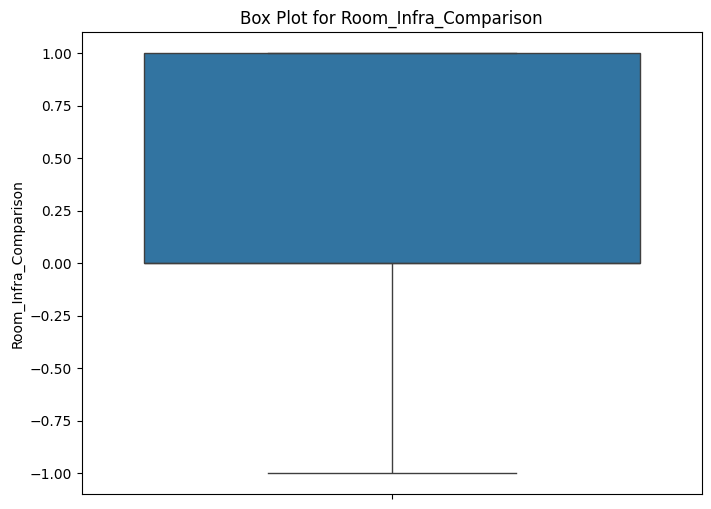

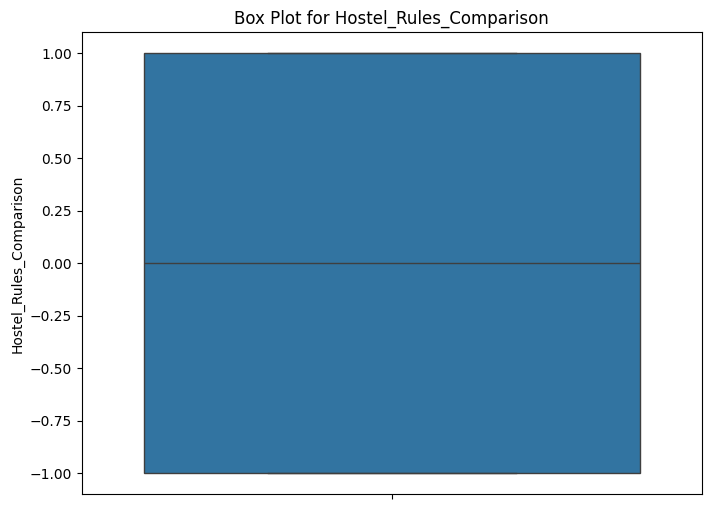

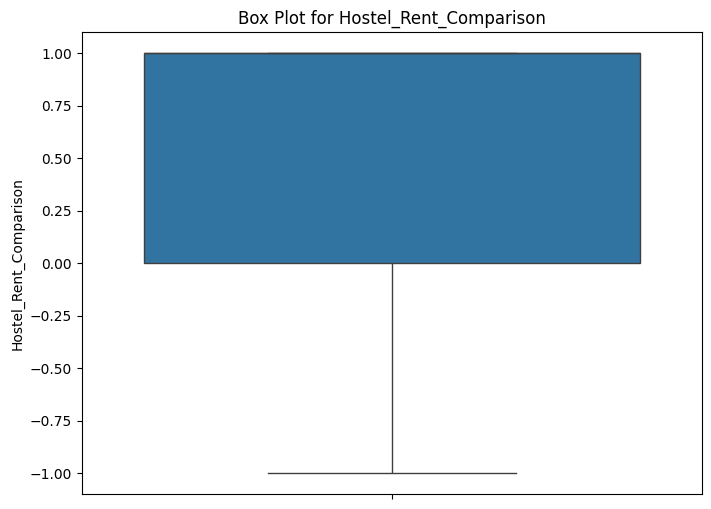

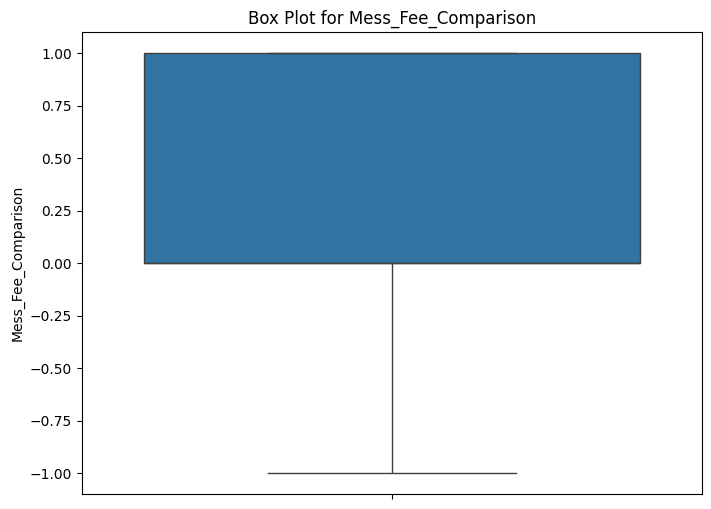

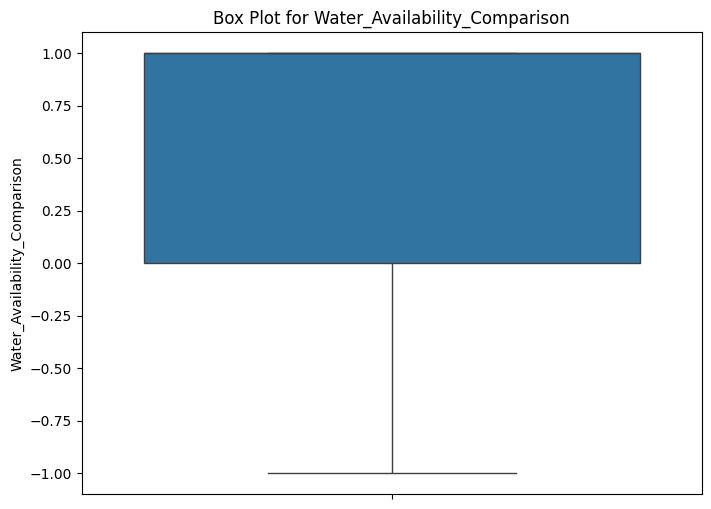

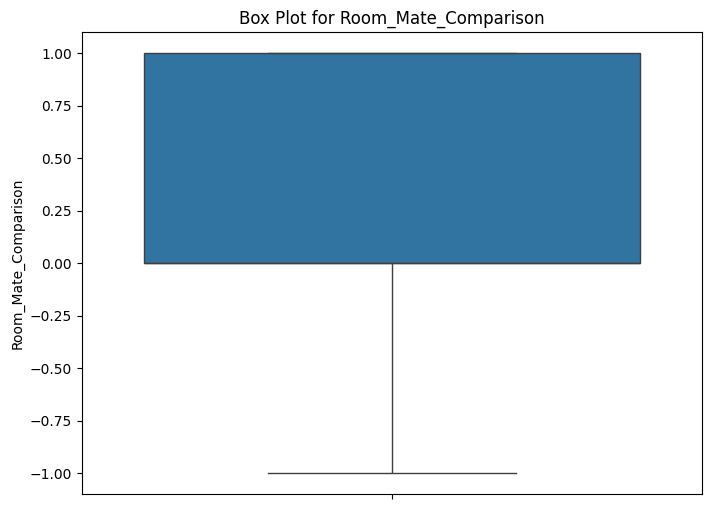

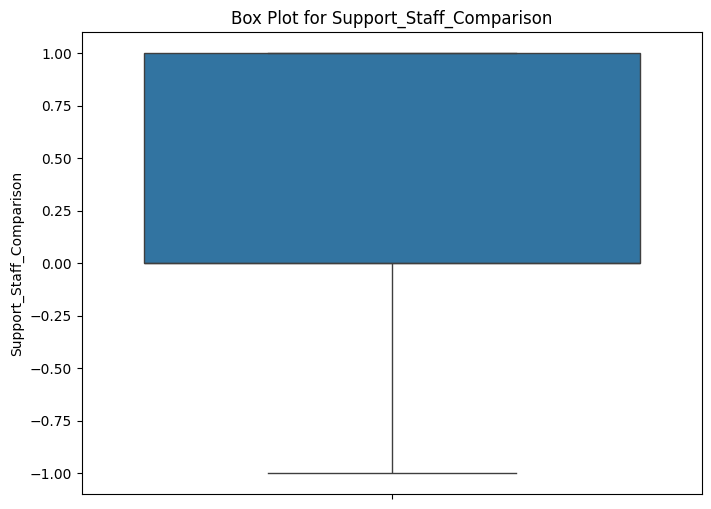

In [41]:
# Loop through numeric columns and plot box plots
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df1[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


## Z-Score Calculation and Visualization for Outlier Detection

This Python code calculates z-scores for each numeric column in a DataFrame (`df1`) and visualizes them to help identify outliers. Z-scores indicate how many standard deviations a data point is from the mean, with values greater than 3 or less than -3 often considered outliers.

### Code Explanation:

1. **Importing the `stats` Module:**
   - `from scipy import stats` imports the `stats` module from the SciPy library, which is used for statistical computations, including z-score calculations.

2. **Calculating Z-Scores:**
   - `z_scores = df1[numeric_columns].apply(stats.zscore)` computes the z-scores for each numeric column in the DataFrame. The `apply` function applies the `zscore` function to each numeric column, returning a DataFrame of z-scores where each value represents how many standard deviations the original value is from the mean of its respective column.

3. **Looping Through Numeric Columns to Plot Z-Scores:**
   - The `for` loop iterates over each column in `numeric_columns` to create a scatter plot of the z-scores.

4. **Creating Scatter Plots:**
   - For each column, a new figure is created with `plt.figure(figsize=(8, 6))` to ensure that each plot has a suitable size.
   - `plt.scatter(data.index, z_scores[column])` generates a scatter plot where the x-axis represents the index of the data points, and the y-axis shows the z-scores for the current column.
   
5. **Adding Threshold Lines for Outliers:**
   - `plt.axhline(y=3, color='r', linestyle='--')` and `plt.axhline(y=-3, color='r', linestyle='--')` add horizontal dashed red lines at +3 and -3, which serve as thresholds for identifying potential outliers. Data points beyond these thresholds are considered outliers.

6. **Adding a Title:**
   - `plt.title(f'Z-Score Plot for {column}')` dynamically creates a title for each plot, indicating the name of the column being visualized.

7. **Displaying the Plot:**
   - `plt.show()` renders the plot, displaying it before moving on to the next column.

### Use Case:
This code is useful for detecting outliers based on z-scores. By plotting the z-scores, you can quickly identify which data points in each numeric column deviate significantly from the mean and may require further investigation or cleaning.


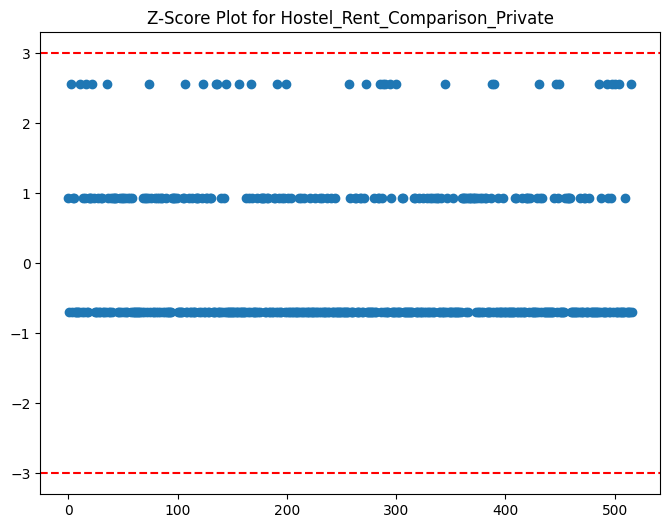

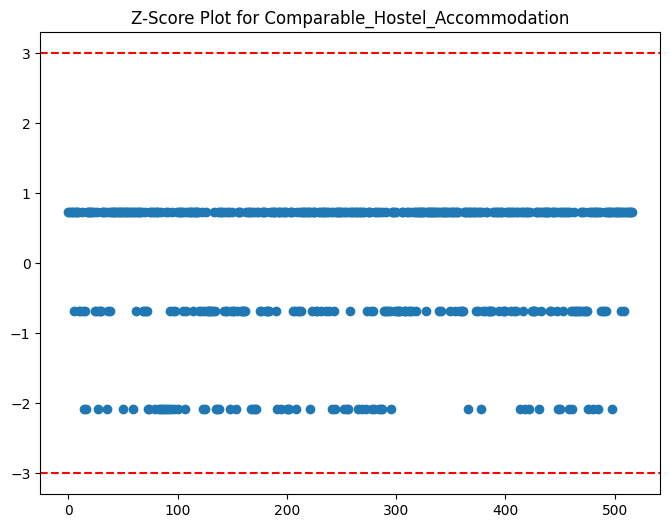

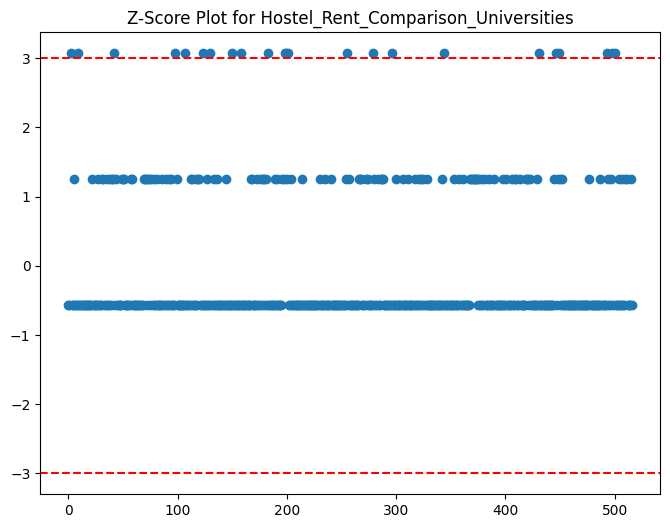

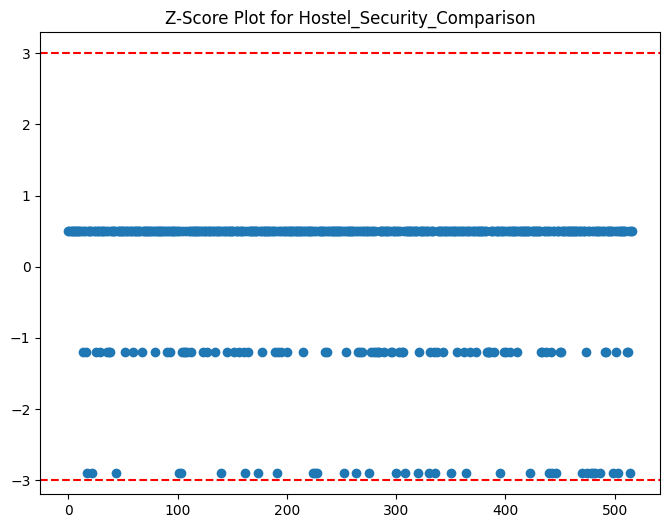

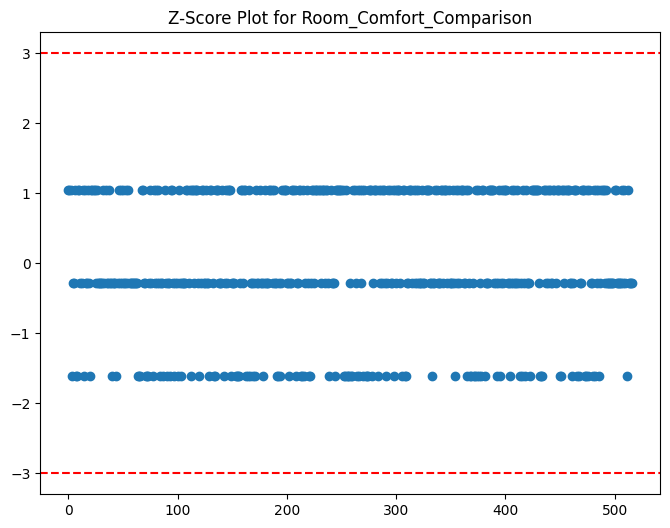

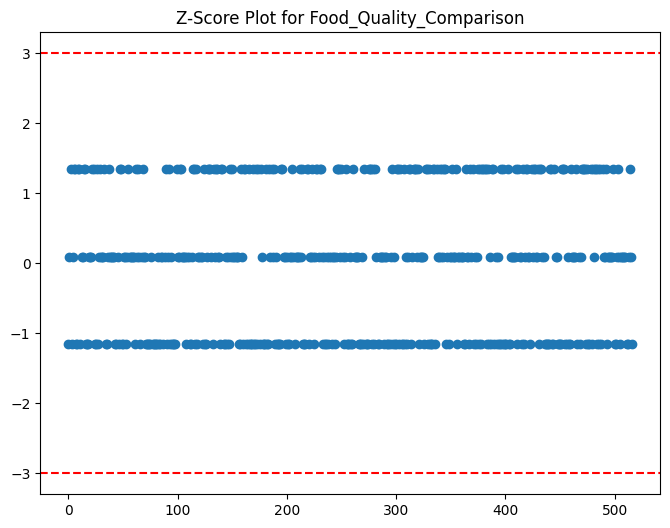

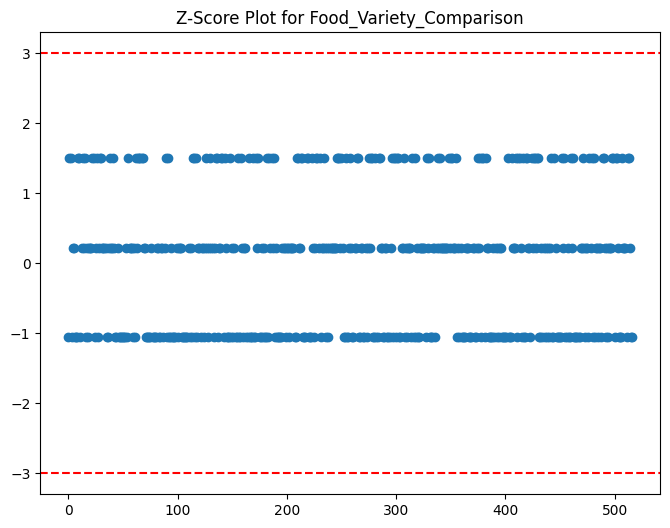

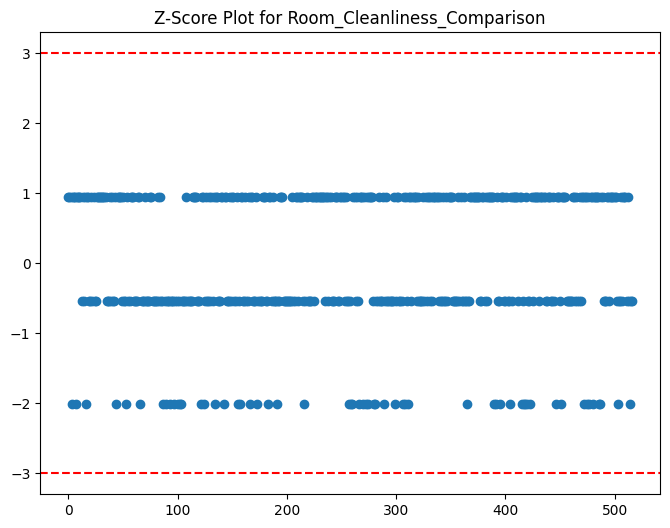

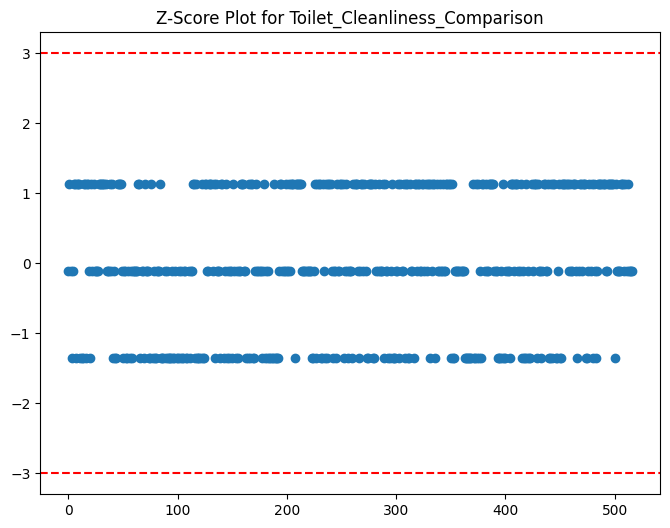

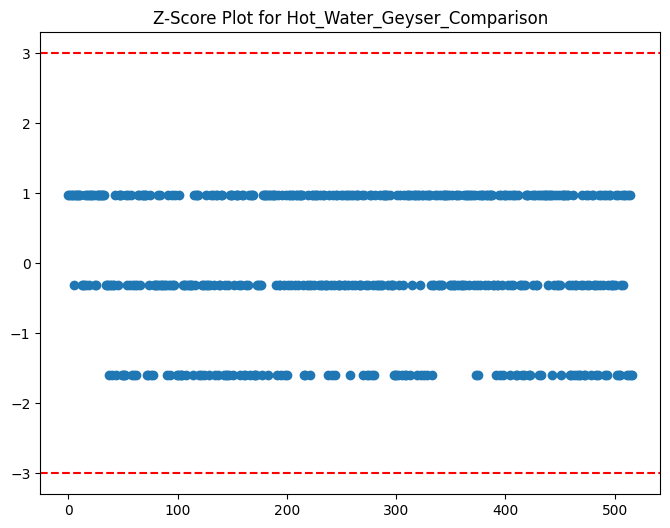

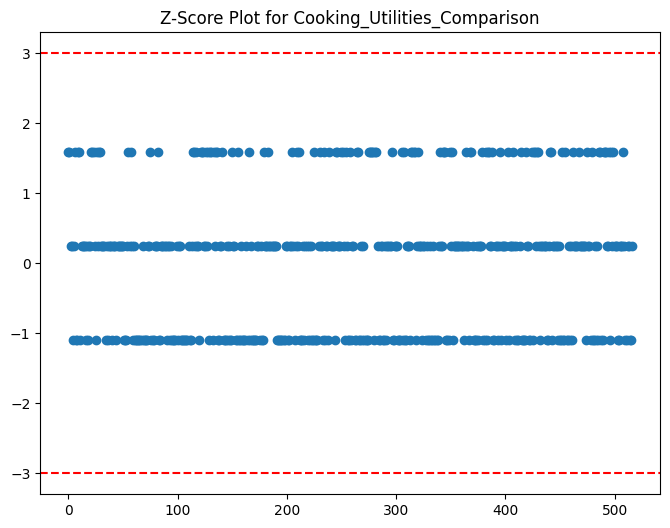

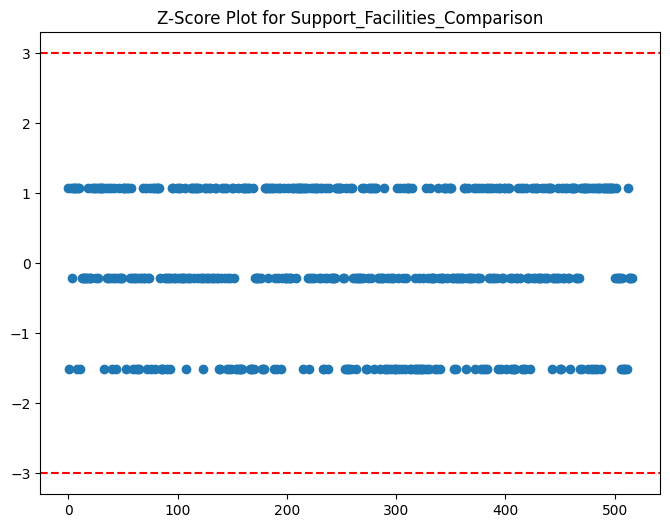

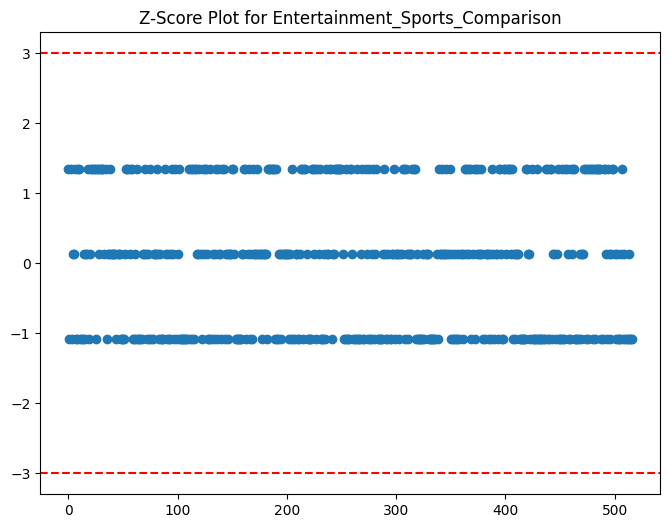

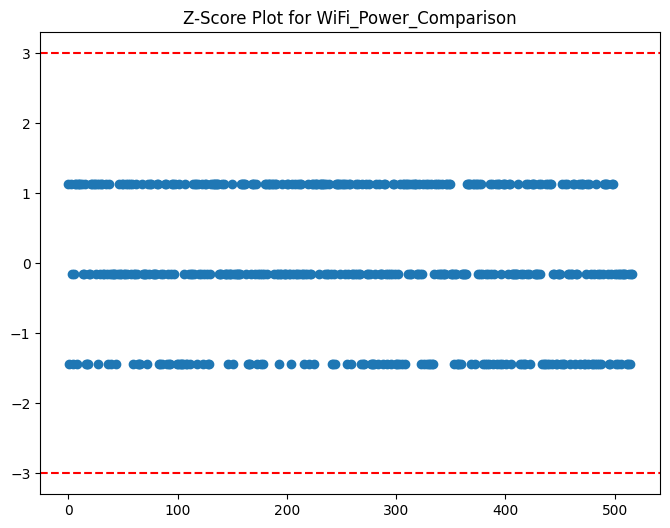

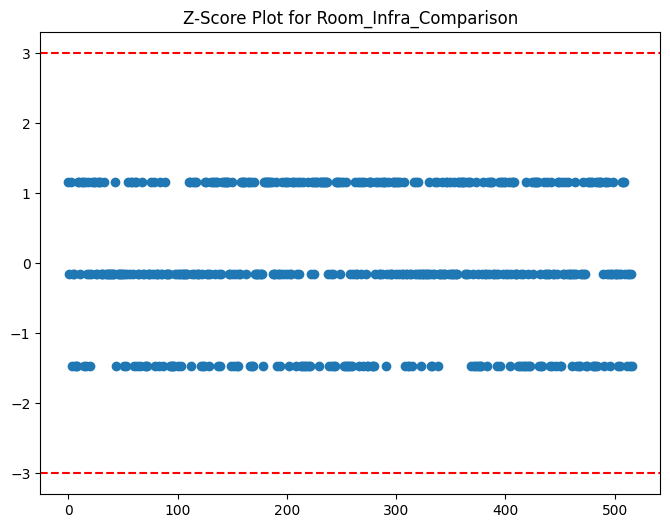

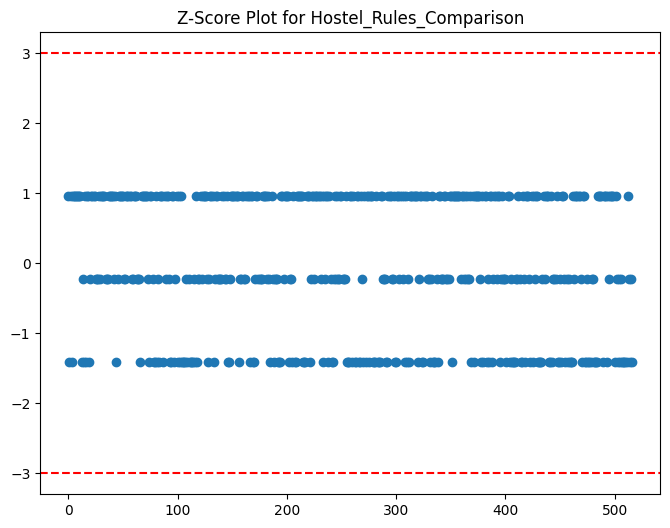

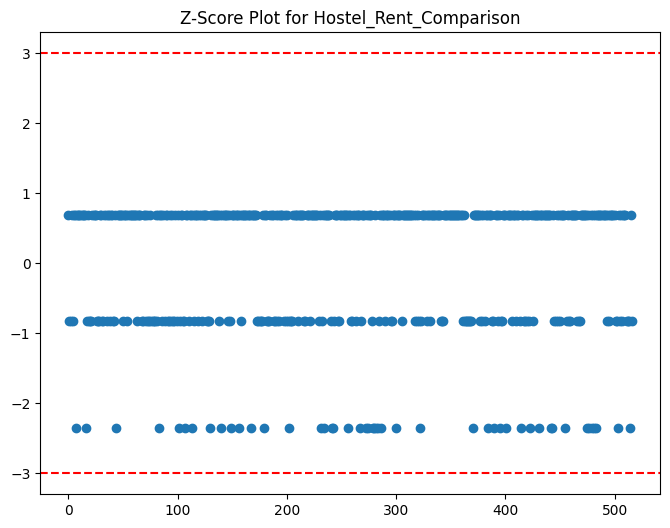

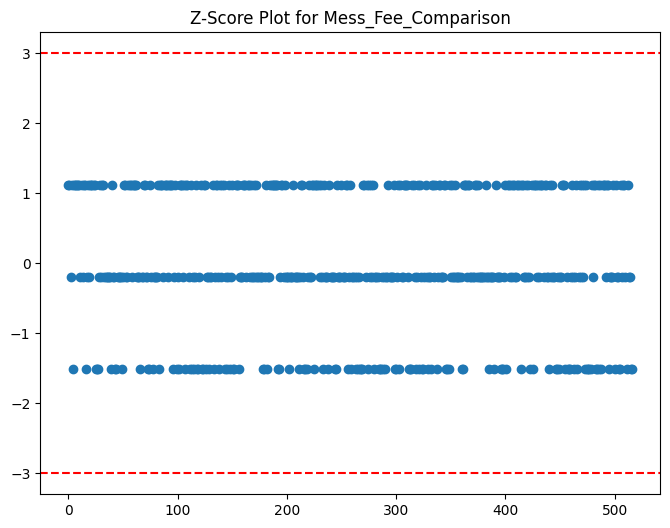

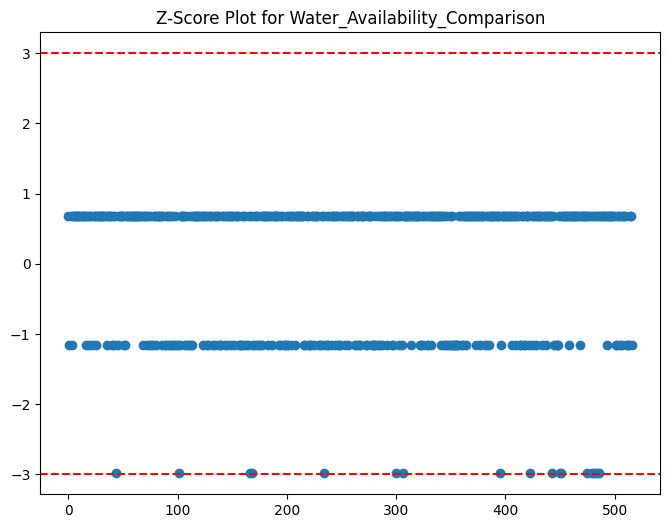

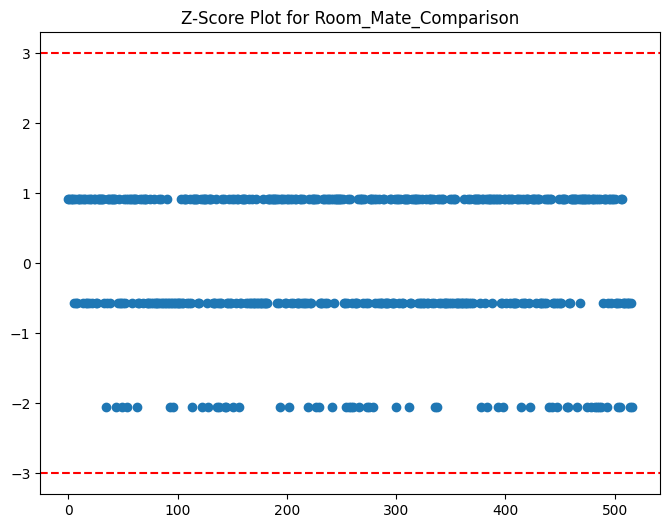

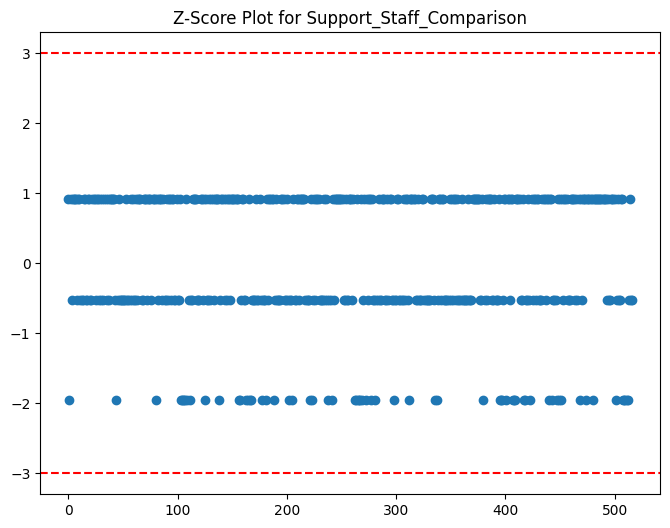

In [43]:
from scipy import stats

# Calculate z-scores for numeric columns
z_scores = df1[numeric_columns].apply(stats.zscore)

# Visualize z-scores for each column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, z_scores[column])
    plt.axhline(y=3, color='r', linestyle='--')  # Outliers threshold (above 3 or below -3)
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.title(f'Z-Score Plot for {column}')
    plt.show()


## Looping through Numeric Columns to Plot Histograms

This Python code loops through all the numeric columns in a DataFrame (`df1`) and generates individual histograms for each column. Histograms allow you to visualize the distribution of data, showing how frequently values fall into different ranges (bins).

### Code Explanation:

1. **Looping Through Numeric Columns:**
   - The `for` loop iterates over each numeric column in `numeric_columns`, which was previously selected from `df1` using the column data types.

2. **Creating a Histogram for Each Column:**
   - For each column, a new figure is created with `plt.figure(figsize=(8, 6))` to ensure the histogram is appropriately sized.
   - `plt.hist(df1[column], bins=10, edgecolor='k')` creates a histogram for the current column, with the data split into 10 bins. The `edgecolor='k'` argument adds a black border around each bar for better visibility.

3. **Labeling the Axes:**
   - `plt.xlabel(column)` sets the x-axis label to the name of the current column.
   - `plt.ylabel('Frequency')` labels the y-axis as 'Frequency', showing how many data points fall into each bin.

4. **Adding a Title:**
   - `plt.title(f'Histogram for {column}')` dynamically generates a title for each plot, indicating which column's distribution is being visualized.

5. **Displaying the Plot:**
   - `plt.show()` renders and displays the histogram for each column before moving to the next one.

### Use Case:
This code is useful for visualizing the distribution of numerical data in a DataFrame. Histograms help identify patterns such as skewness, normality, or the presence of outliers in each numeric feature.


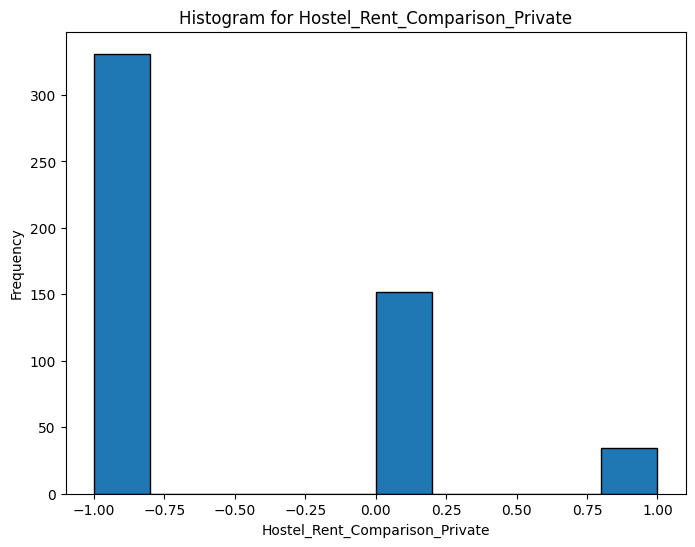

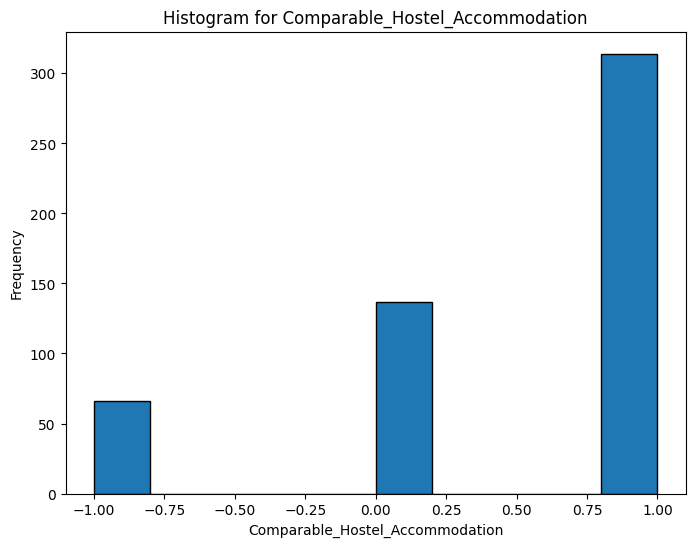

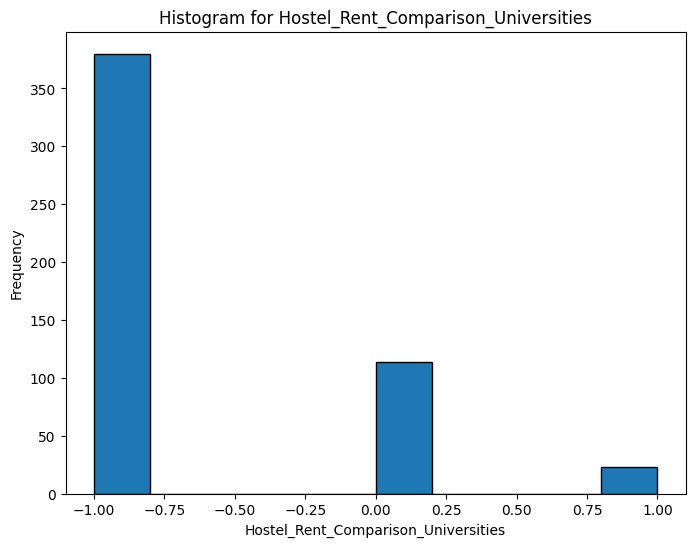

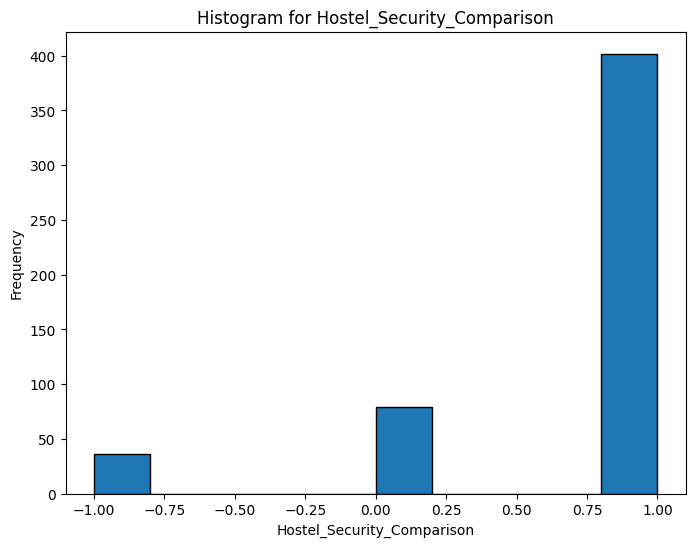

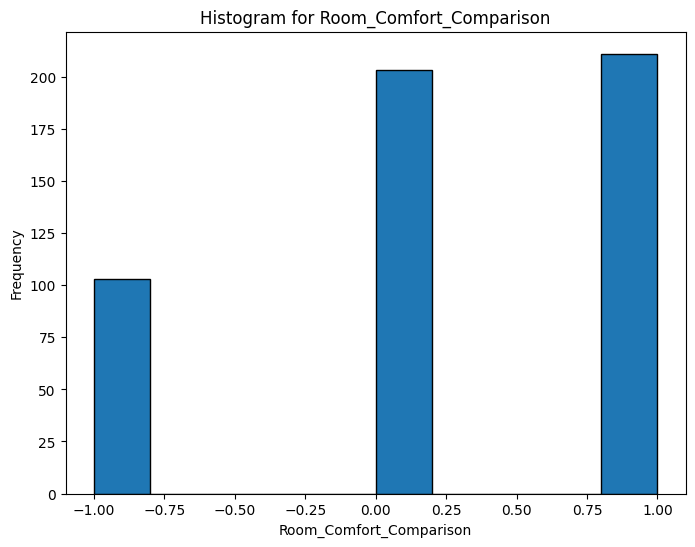

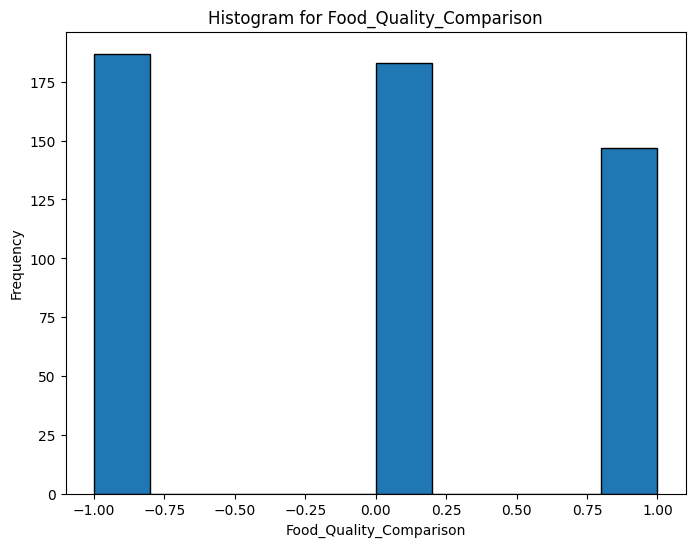

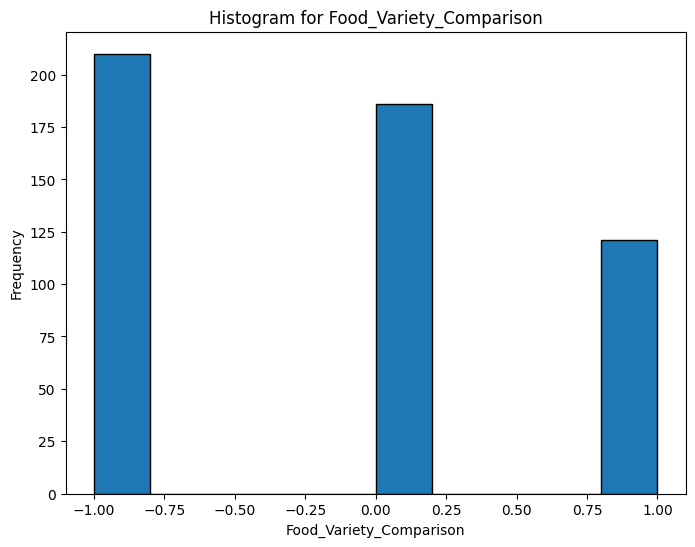

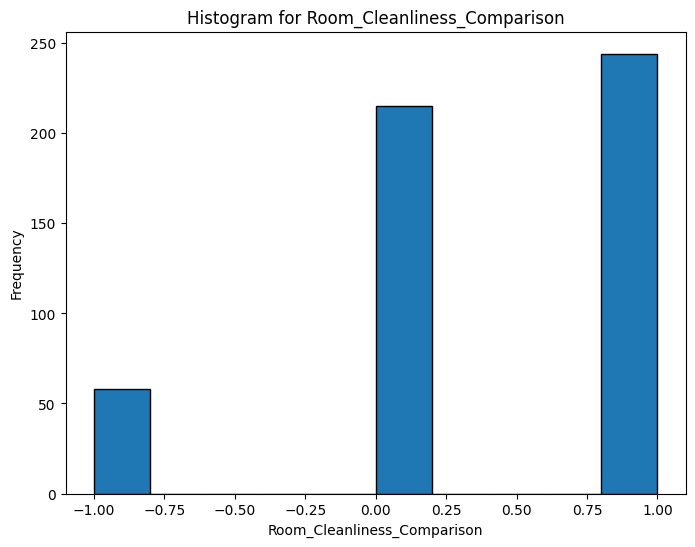

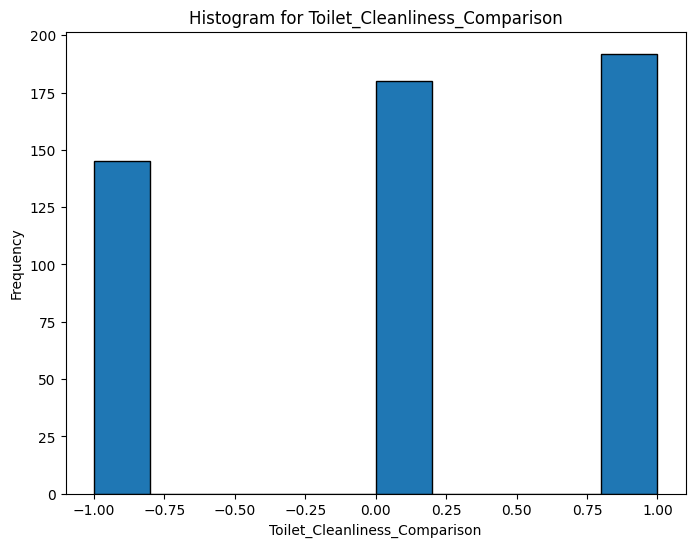

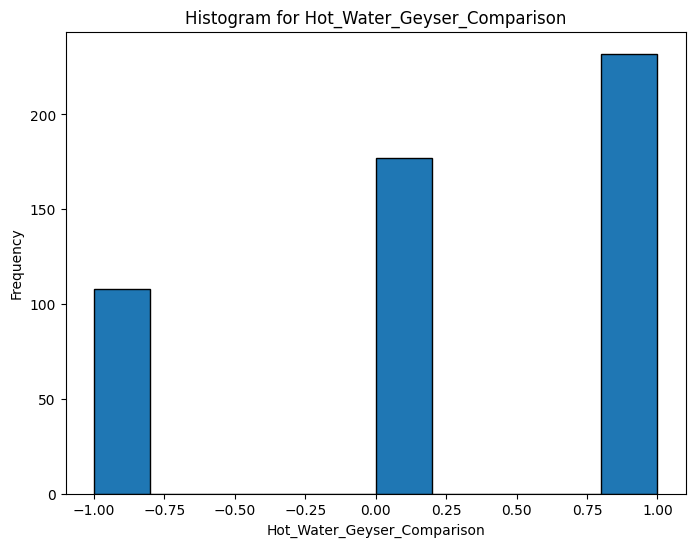

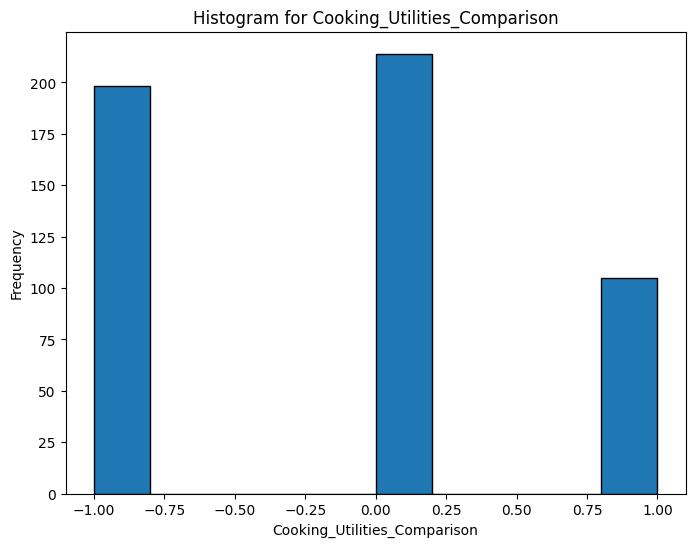

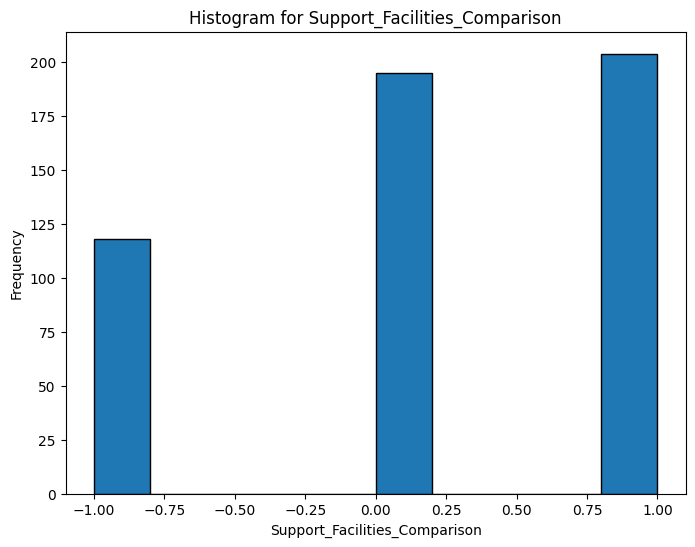

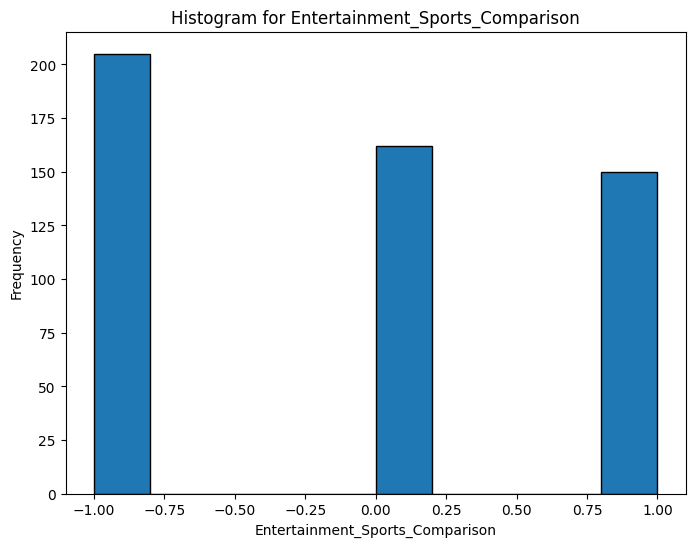

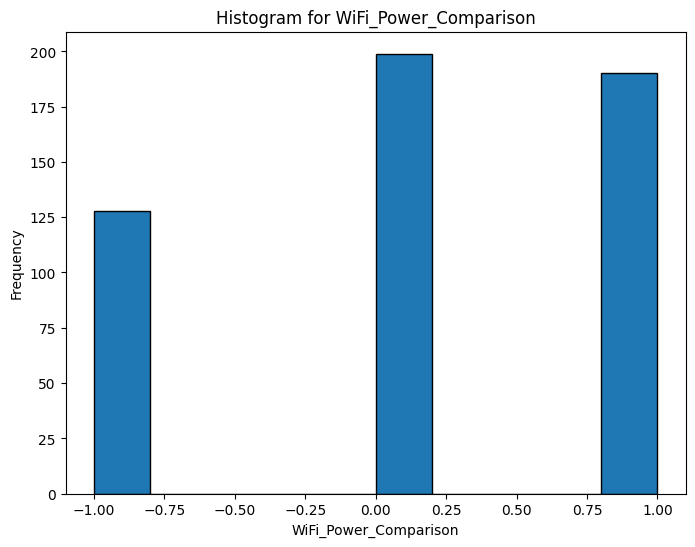

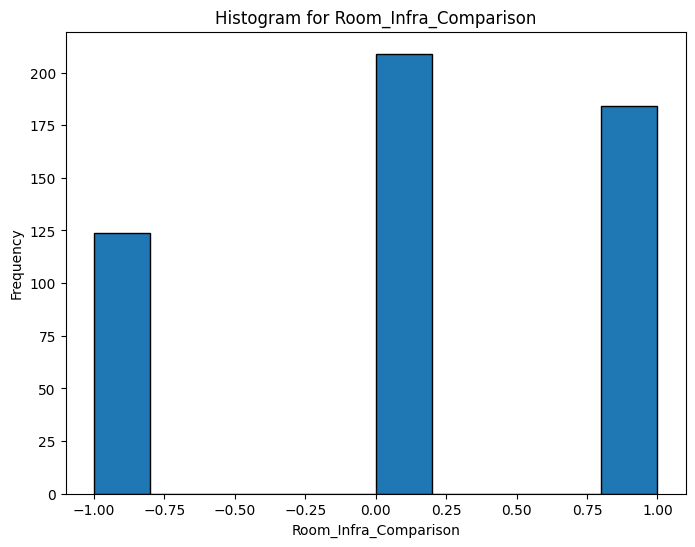

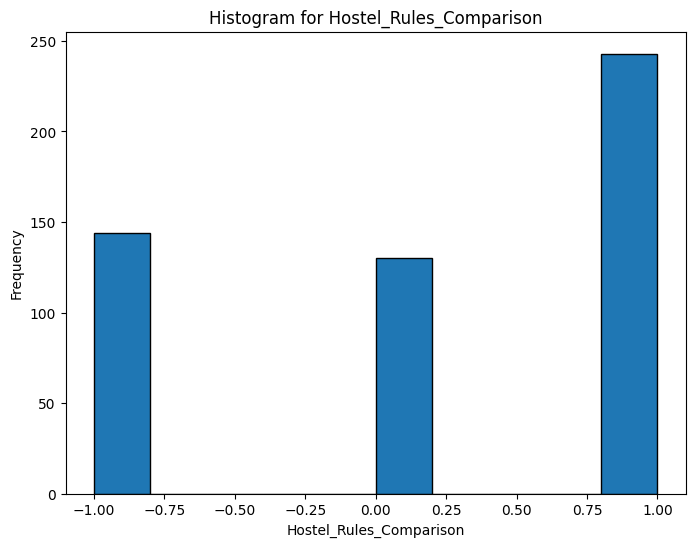

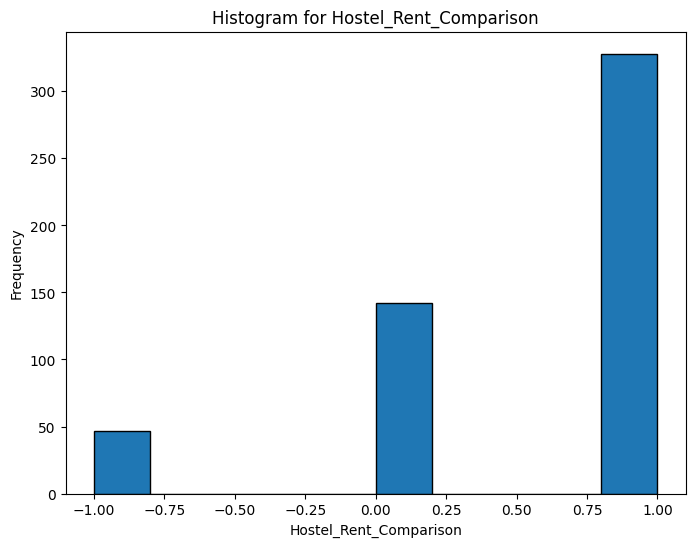

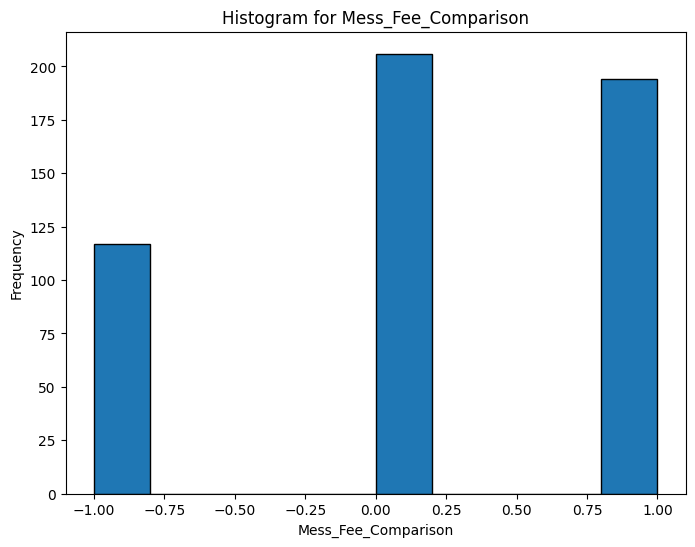

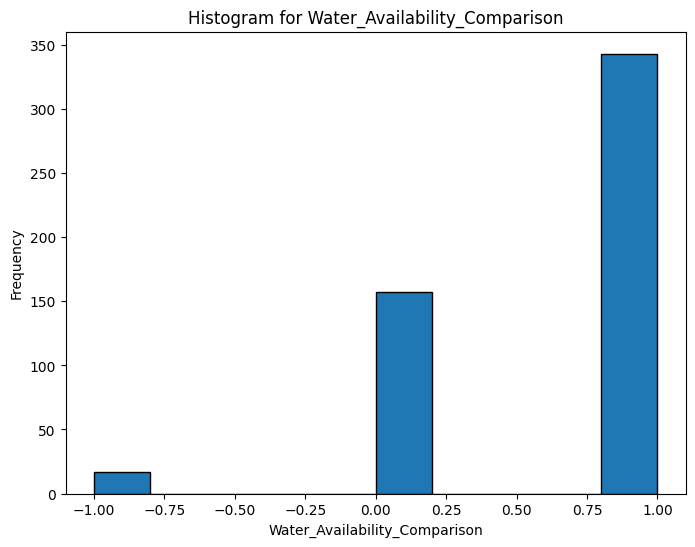

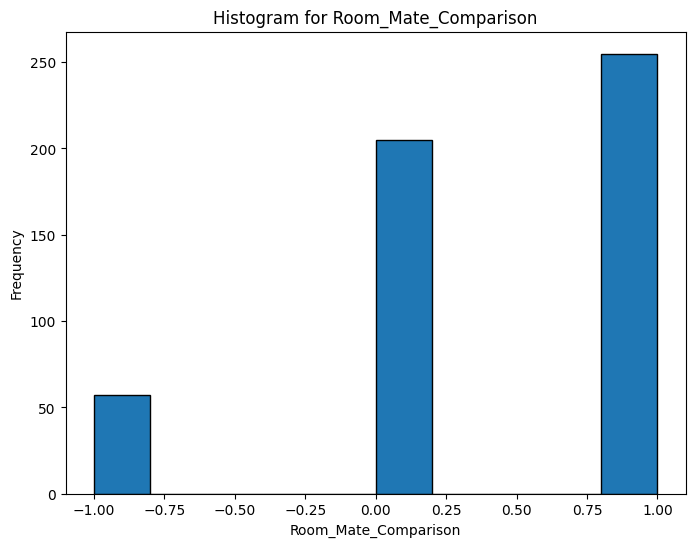

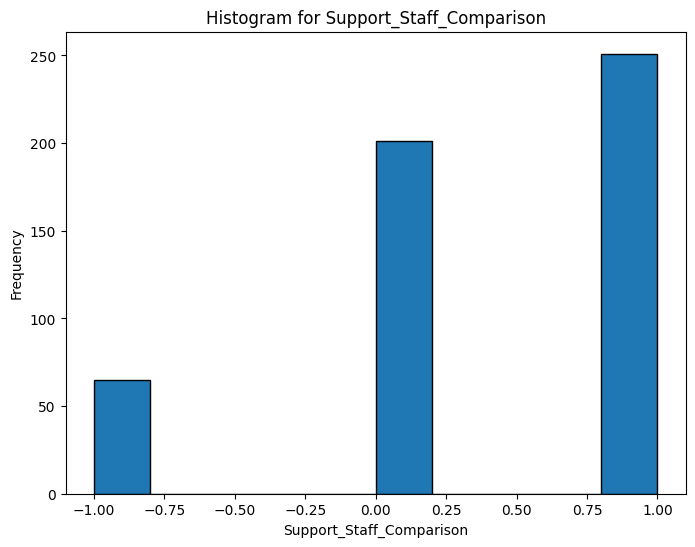

In [50]:
# Loop through numeric columns and plot histograms
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df1[column], bins=10, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.show()


## Looping Through Numeric Columns to Plot Density Plots

This Python code loops through all the numeric columns in a DataFrame (`df1`) and generates individual density plots for each column using Kernel Density Estimation (KDE). Density plots provide a smooth estimate of the probability distribution of a continuous variable.

### Code Explanation:

1. **Looping Through Numeric Columns:**
   - The `for` loop iterates over each numeric column in `numeric_columns`, which contains the numeric features of the DataFrame `df1`.

2. **Creating a Density Plot for Each Column:**
   - For each column, a new figure is created using `plt.figure(figsize=(8, 6))` to set the figure size.
   - `sns.kdeplot(df1[column], shade=True)` generates a KDE plot for the current column. The `shade=True` argument fills the area under the KDE curve, making the plot visually more intuitive.
   
3. **Adding a Title:**
   - `plt.title(f'Density Plot for {column}')` adds a title to the plot, indicating the name of the column whose distribution is being visualized.

4. **Displaying the Plot:**
   - `plt.show()` renders and displays the density plot for each numeric column before moving to the next one.

### Use Case:
This code is useful for visualizing the distribution of numeric columns in a smooth, continuous form. Density plots provide a clearer understanding of the data's underlying distribution, especially for identifying multimodal distributions and skewness.


<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


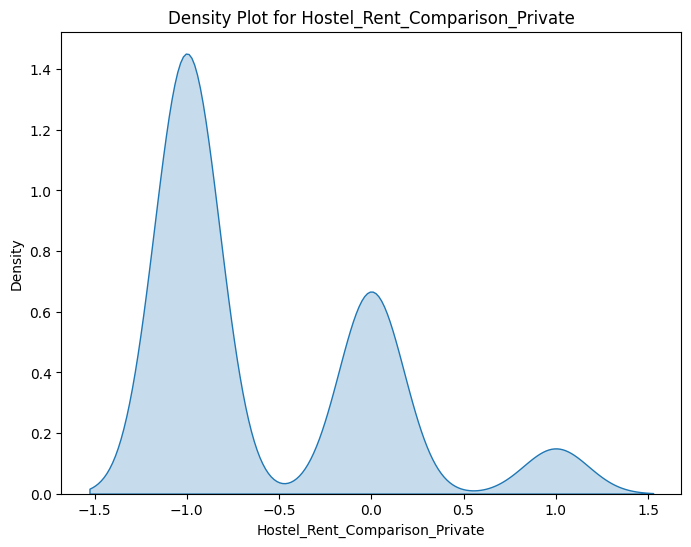

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


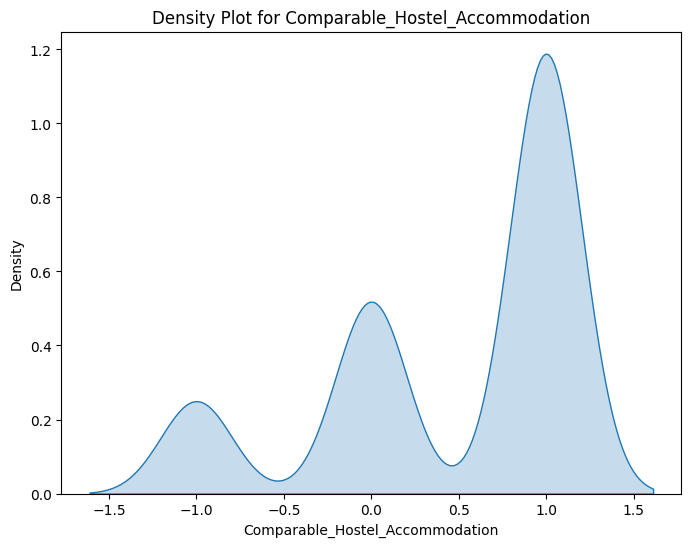

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


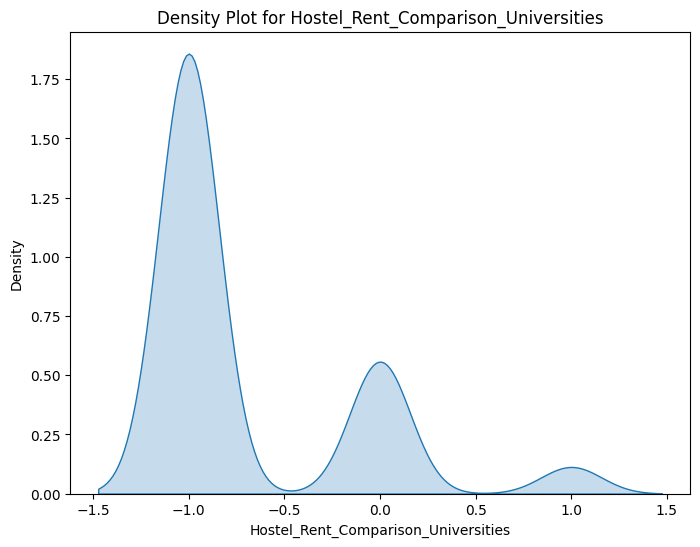

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


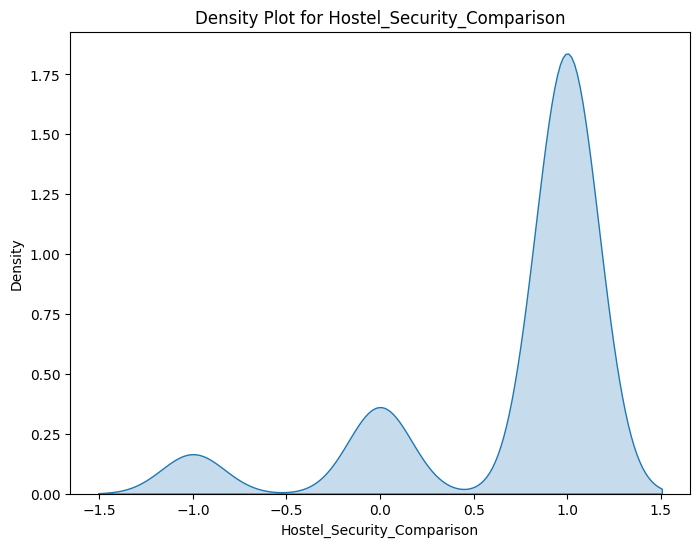

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


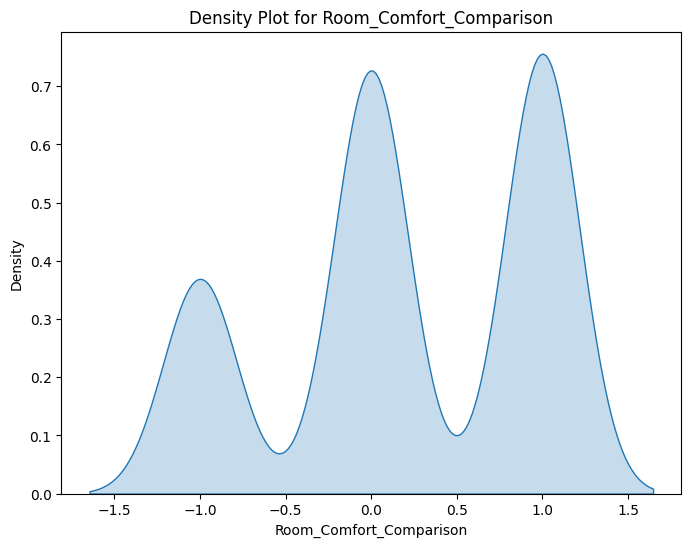

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


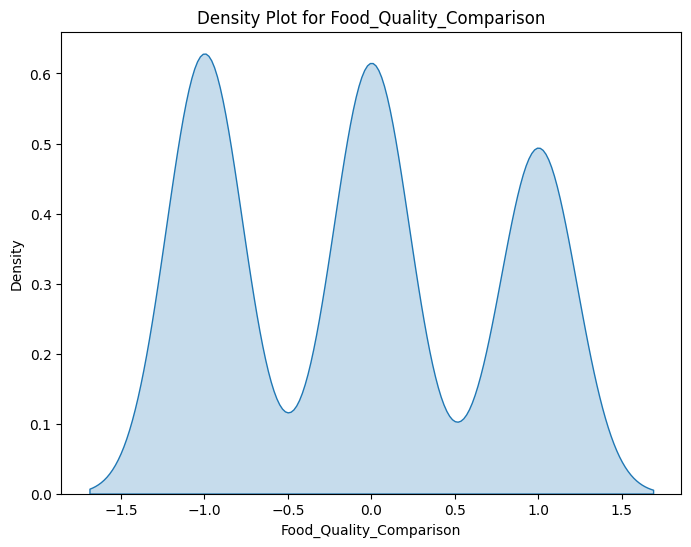

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


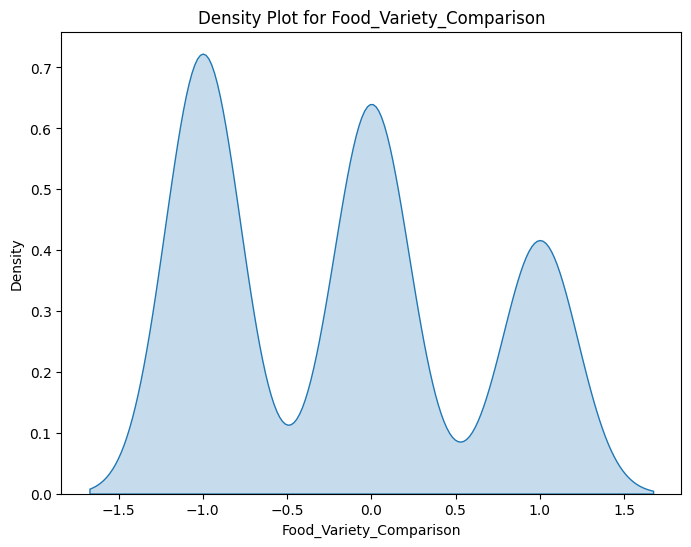

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


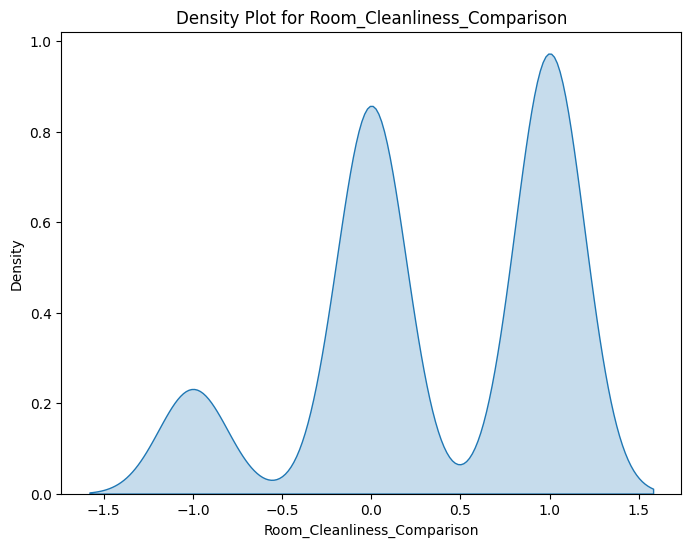

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


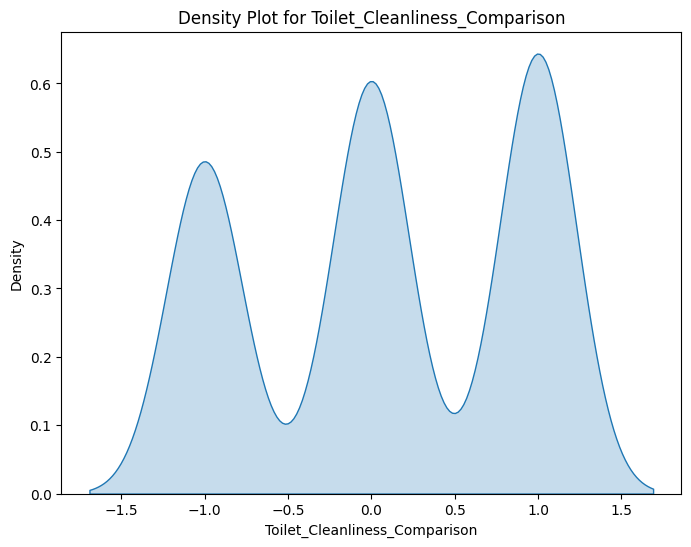

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


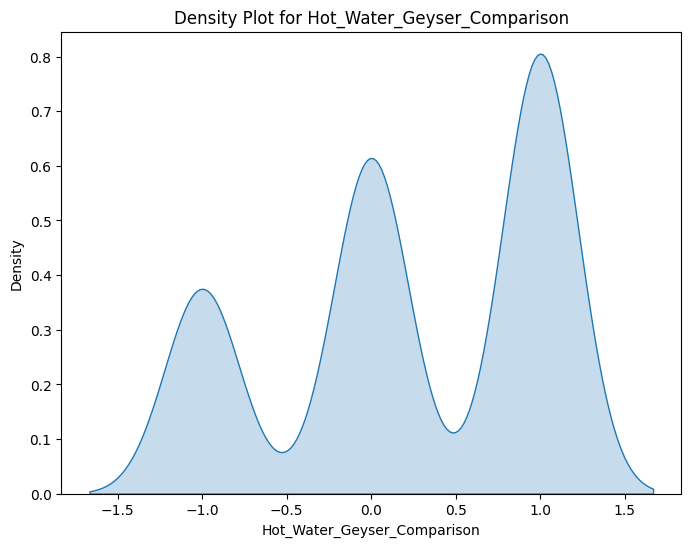

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


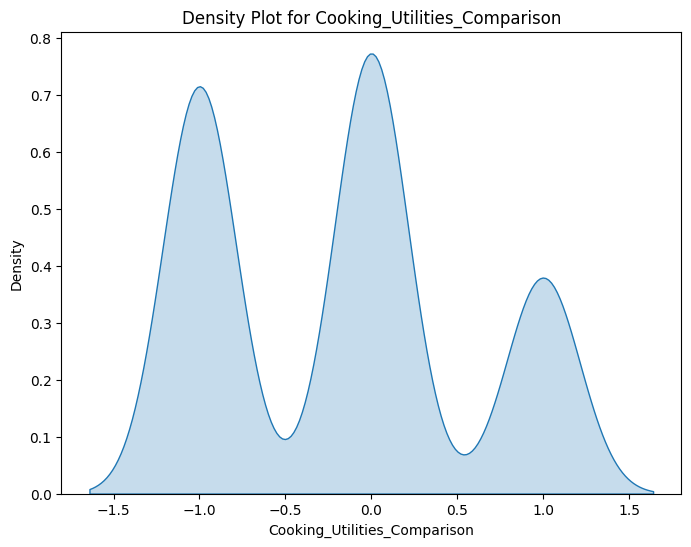

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


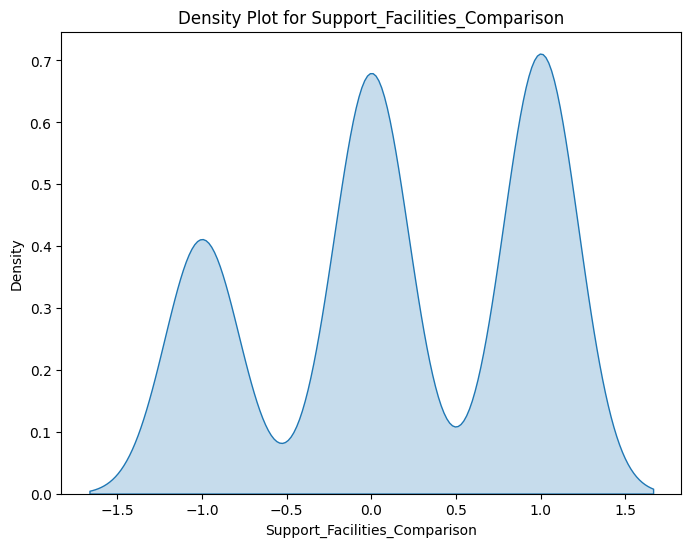

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


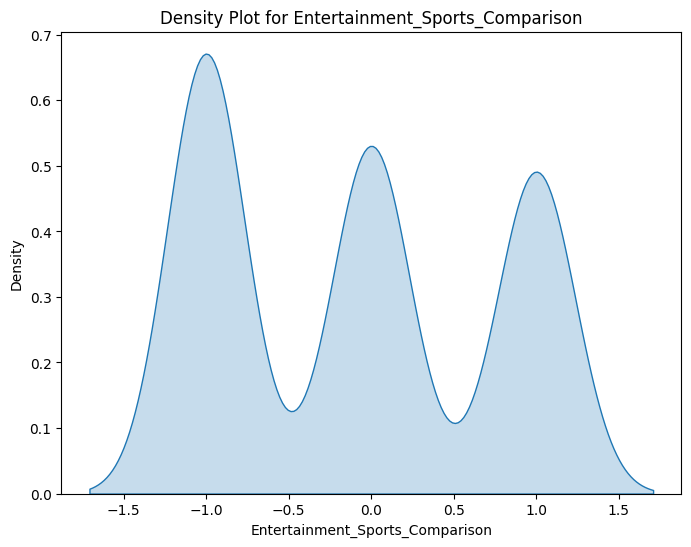

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


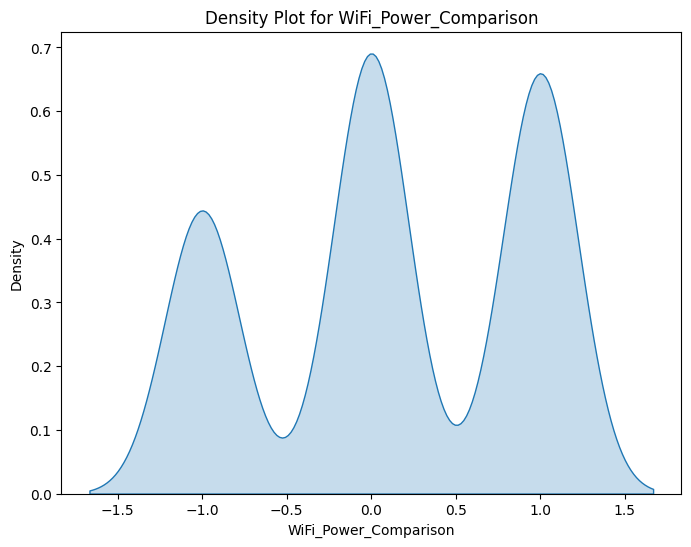

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


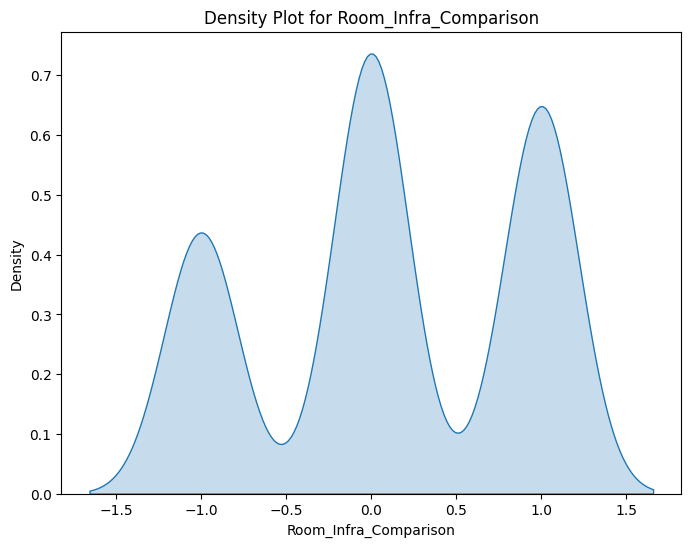

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


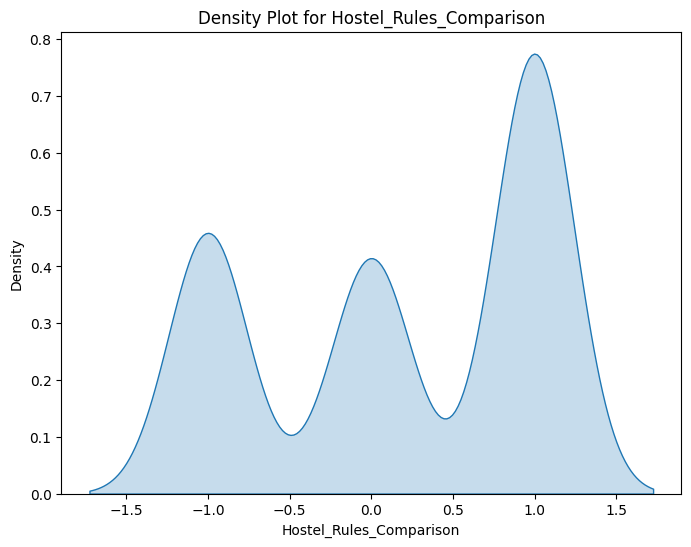

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


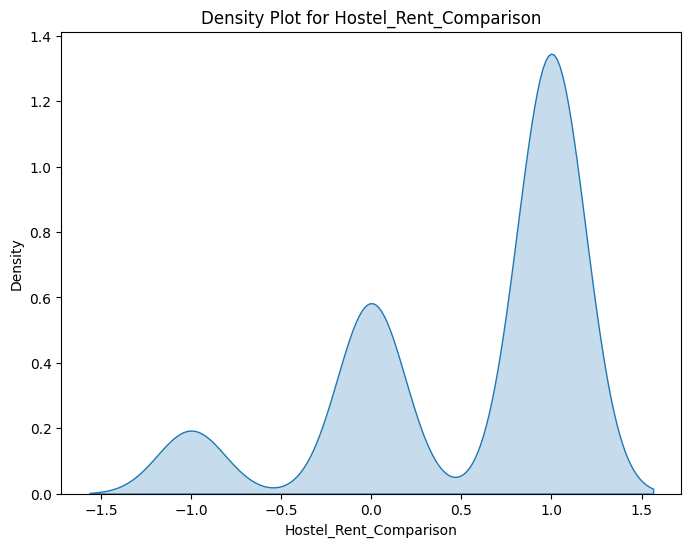

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


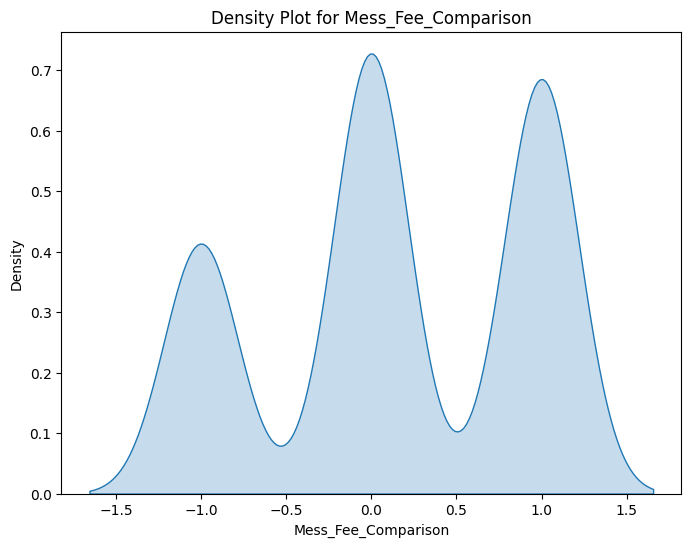

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


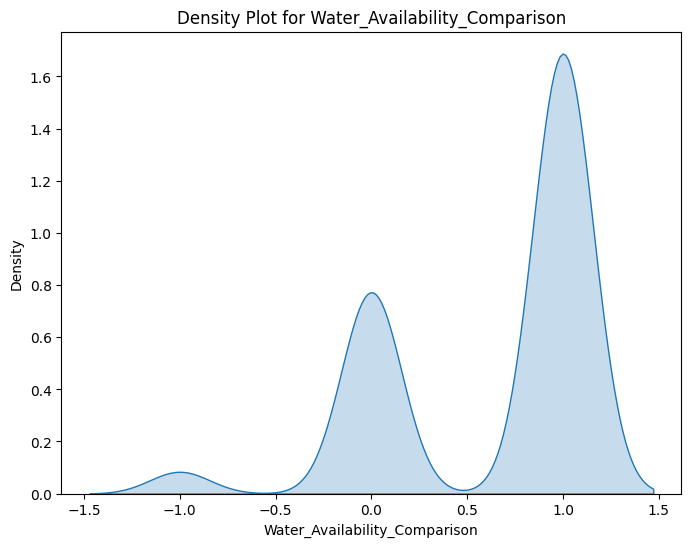

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


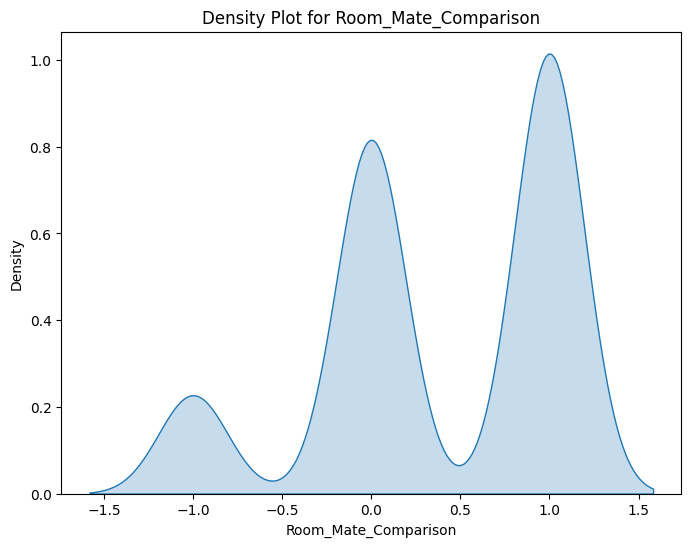

<ipython-input-53-9f92d2aec7df>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[column], shade=True)


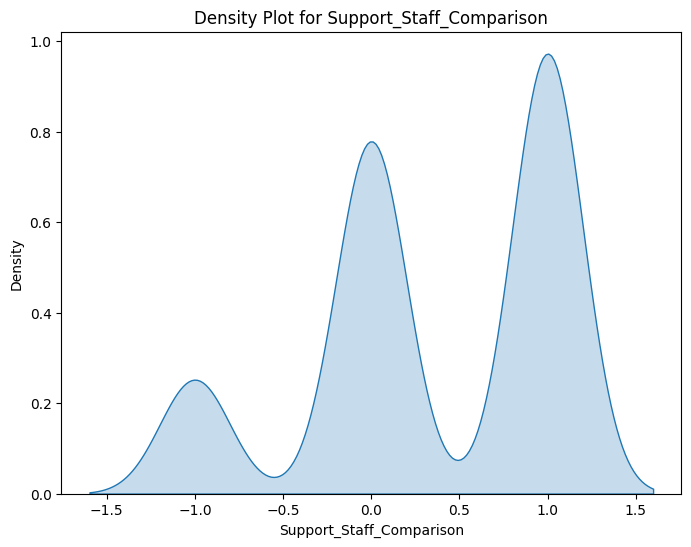

In [53]:
# Loop through numeric columns and plot density plots for each
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df1[column], shade=True)
    plt.title(f'Density Plot for {column}')
    plt.show()


## Outputting Summary Statistics

This Python code snippet outputs the summary statistics of a DataFrame.

### Code Explanation:

1. **Printing the Summary Statistics:**
   - `print("\nSummary Statistics:\n", summary_stats)` is used to display the summary statistics that are stored in the `summary_stats` variable. The `\n` adds a newline before the printed text for better readability.
   
   - The summary statistics likely include important descriptive information about the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column.

### Use Case:
This code is useful when you want to view the key descriptive statistics of a dataset. Summary statistics provide a quick overview of the central tendency, spread, and range of your data.


In [52]:

# Output the results

print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
        Hostel_Rent_Comparison_Private Comparable_Hostel_Accommodation  \
count                             517                             517   
unique                              3                               3   
top                             Lower                 Yes, Comparable   
freq                              331                             314   

       Hostel_Rent_Comparison_Universities Hostel_Security_Comparison  \
count                                  517                        517   
unique                                   3                          3   
top                                  Lower                     Better   
freq                                   380                        402   

       Room_Comfort_Comparison Food_Quality_Comparison  \
count                      517                     517   
unique                       3                       3   
top                     Better                Inferior   
freq          

In [15]:
df_encoded = pd.get_dummies(df1)

In [16]:
df_encoded.head()

Hostel_Rent_Comparison_Private_Higher  \
0                                  False   
1                                  False   
2                                   True   
3                                  False   
4                                  False   

   Hostel_Rent_Comparison_Private_Lower  Hostel_Rent_Comparison_Private_Same  \
0                                 False                                 True   
1                                  True                                False   
2                                 False                                False   
3                                  True                                False   
4                                 False                                 True   

   Comparable_Hostel_Accommodation_No, Hostel Is Better  \
0                                              False      
1                                              False      
2                                              False      
3                                              False      
4                                              False      

   Comparable_Hostel_Accommodation_No, Outside Is Better  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   Comparable_Hostel_Accommodation_Yes, Comparable  \
0                                             True   
1                                             True   
2                                             True   
3                                             True   
4                                             True   

   Hostel_Rent_Comparison_Universities_Higher  \
0                                       False   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   Hostel_Rent_Comparison_Universities_Lower  \
0                                       True   
1                                       True   
2                                      False   
3                                       True   
4                                       True   

   Hostel_Rent_Comparison_Universities_Same  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   Hostel_Security_Comparison_Better  ...  Mess_Fee_Comparison_Same  \
0                               True  ...                     False   
1                               True  ...                     False   
2                               True  ...                      True   
3                               True  ...                     False   
4                               True  ...                     False   

   Water_Availability_Comparison_Better  \
0                                  True   
1                                 False   
2                                  True   
3                                 False   
4                                  True   

   Water_Availability_Comparison_Inferior  Water_Availability_Comparison_Same  \
0                                   False                               False   
1                                   False                                True   
2                                   False                               False   
3                                   False                                True   
4                                   False                               False   

   Room_Mate_Comparison_Better  Room_Mate_Comparison_Inferior  \
0                         True                          False   
1                         True                